## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe # - import your class from environment file
import collections
import numpy as np
import random
import pickle
from time import time
from matplotlib import pyplot as plt
import math

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        Q_dict[state1]={}
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
max_epsilon = 1.0
min_epsilon = 0.01
ep = np.arange(0,10000000)
epsilon = []
for i in range(0,10000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.0000005*i))

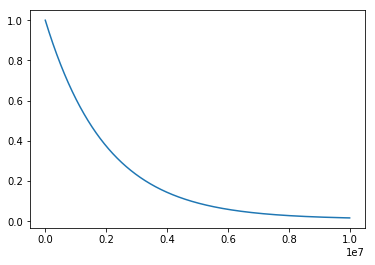

In [6]:
plt.plot(ep, epsilon)
plt.show()

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy_strategy(episode, curr_state):
    eps = epsilon[episode] if (episode<(len(epsilon)-1)) else epsilon[(len(epsilon)-1)]
    threshold = random.random()
    q_acts = Q_dict.get(Q_state(curr_state))
    if eps > threshold:
        #Code to do exploration here
        #poss_acts = list(env.action_space(curr_state)[0])
        return random.choice(list(q_acts))
    else:
        #Code to do exploitaion here
        keyMax = max(q_acts, key= lambda x: q_acts[x]) 
        valueMax = q_acts[keyMax]
        allKeys = [k for k, v in q_acts.items() if v == valueMax]
        #If only one action has max value return that action.
        if len(allKeys) == 1:
            return keyMax
        else:
            #If multiple keys have max value return a random choice of one of the keys with max value
            return random.choice(allKeys)

#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
env = TicTacToe()
Q_dict = {}
States_track = {}

In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    #use starting state of all nans, use state of first odd number in different positions
    state_vecs = []
    #Initial board position
    state_vecs.append([np.nan for i in range(0,9)])
    #Agent winning state
    state_vecs.append([np.nan,8,np.nan,np.nan,np.nan,1,np.nan,6,9])
    #Another agent winning state
    state_vecs.append([8,np.nan,6,np.nan,7,np.nan,np.nan,np.nan,3])                  
    #Third agent winning state
    state_vecs.append([5,np.nan,np.nan,np.nan,1,np.nan,2,np.nan,4])            
    for vec in state_vecs:
        add_to_dict(vec)
        valid_act = valid_actions(vec)  #Only the agent's actions need to be considered
        States_track[Q_state(vec)]={}
        for act in valid_act:
            States_track[Q_state(vec)][act]=[0]

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()

In [13]:
#print(Q_dict)
print(States_track)

{'x-x-x-x-x-x-x-x-x': {(0, 1): [0], (0, 3): [0], (0, 5): [0], (0, 7): [0], (0, 9): [0], (1, 1): [0], (1, 3): [0], (1, 5): [0], (1, 7): [0], (1, 9): [0], (2, 1): [0], (2, 3): [0], (2, 5): [0], (2, 7): [0], (2, 9): [0], (3, 1): [0], (3, 3): [0], (3, 5): [0], (3, 7): [0], (3, 9): [0], (4, 1): [0], (4, 3): [0], (4, 5): [0], (4, 7): [0], (4, 9): [0], (5, 1): [0], (5, 3): [0], (5, 5): [0], (5, 7): [0], (5, 9): [0], (6, 1): [0], (6, 3): [0], (6, 5): [0], (6, 7): [0], (6, 9): [0], (7, 1): [0], (7, 3): [0], (7, 5): [0], (7, 7): [0], (7, 9): [0], (8, 1): [0], (8, 3): [0], (8, 5): [0], (8, 7): [0], (8, 9): [0]}, 'x-8-x-x-x-1-x-6-9': {(0, 3): [0], (0, 5): [0], (0, 7): [0], (2, 3): [0], (2, 5): [0], (2, 7): [0], (3, 3): [0], (3, 5): [0], (3, 7): [0], (4, 3): [0], (4, 5): [0], (4, 7): [0], (6, 3): [0], (6, 5): [0], (6, 7): [0]}, '8-x-6-x-7-x-x-x-3': {(1, 1): [0], (1, 5): [0], (1, 9): [0], (3, 1): [0], (3, 5): [0], (3, 9): [0], (5, 1): [0], (5, 5): [0], (5, 9): [0], (6, 1): [0], (6, 5): [0], (6, 9): 

#### Define hyperparameters  ---write your code here

In [14]:
alpha = 0.85
gamma = 0.65
EPISODES = 10000000

### Q-update loop ---write your code here

In [15]:
start_time = time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    #initialize with a start state of all nans
    curr_state = [np.nan for i in range(0,9)]
    add_to_dict(curr_state)
    is_terminal = False
    reward = 0
    while (not is_terminal):
        #print('Current state {}'.format(curr_state))
        next_act = epsilon_greedy_strategy(episode, curr_state)
        #print('Next act {}'.format(next_act))
        new_state, r, is_terminal = env.step(curr_state,next_act)
        #print('New state {}'.format(new_state))
        #print('r {}'.format(r))
        #print('is_terminal {}'.format(is_terminal))
        add_to_dict(new_state)
        old_q = Q_dict.get(Q_state(curr_state)).get(next_act)
        reward += r
        if(is_terminal):
            q_val = old_q + alpha*(reward - old_q)
        else:            
            q_val = old_q + alpha*(reward + (gamma * max((Q_dict.get(Q_state(new_state)).values()))) - old_q)
        Q_dict[Q_state(curr_state)][next_act] = q_val
        #print('q_vsl {}'.format(q_val))
        curr_state = new_state
        
    if(episode%5000 == 0):
        print('Completed episodes - {}'.format(episode))
        save_tracking_states()
elapsed_time = time() - start_time
print(elapsed_time)
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Completed episodes - 0
Completed episodes - 5000
Completed episodes - 10000
Completed episodes - 15000
Completed episodes - 20000
Completed episodes - 25000
Completed episodes - 30000
Completed episodes - 35000
Completed episodes - 40000
Completed episodes - 45000
Completed episodes - 50000
Completed episodes - 55000
Completed episodes - 60000
Completed episodes - 65000
Completed episodes - 70000
Completed episodes - 75000
Completed episodes - 80000
Completed episodes - 85000
Completed episodes - 90000
Completed episodes - 95000
Completed episodes - 100000
Completed episodes - 105000
Completed episodes - 110000
Completed episodes - 115000
Completed episodes - 120000
Completed episodes - 125000
Completed episodes - 130000
Completed episodes - 135000
Completed episodes - 140000
Completed episodes - 145000
Completed episodes - 150000
Completed episodes - 155000
Completed episodes - 160000
Completed episodes - 165000
Completed episodes - 170000
Completed episodes - 175000
Completed episode

Completed episodes - 1455000
Completed episodes - 1460000
Completed episodes - 1465000
Completed episodes - 1470000
Completed episodes - 1475000
Completed episodes - 1480000
Completed episodes - 1485000
Completed episodes - 1490000
Completed episodes - 1495000
Completed episodes - 1500000
Completed episodes - 1505000
Completed episodes - 1510000
Completed episodes - 1515000
Completed episodes - 1520000
Completed episodes - 1525000
Completed episodes - 1530000
Completed episodes - 1535000
Completed episodes - 1540000
Completed episodes - 1545000
Completed episodes - 1550000
Completed episodes - 1555000
Completed episodes - 1560000
Completed episodes - 1565000
Completed episodes - 1570000
Completed episodes - 1575000
Completed episodes - 1580000
Completed episodes - 1585000
Completed episodes - 1590000
Completed episodes - 1595000
Completed episodes - 1600000
Completed episodes - 1605000
Completed episodes - 1610000
Completed episodes - 1615000
Completed episodes - 1620000
Completed epis

Completed episodes - 2870000
Completed episodes - 2875000
Completed episodes - 2880000
Completed episodes - 2885000
Completed episodes - 2890000
Completed episodes - 2895000
Completed episodes - 2900000
Completed episodes - 2905000
Completed episodes - 2910000
Completed episodes - 2915000
Completed episodes - 2920000
Completed episodes - 2925000
Completed episodes - 2930000
Completed episodes - 2935000
Completed episodes - 2940000
Completed episodes - 2945000
Completed episodes - 2950000
Completed episodes - 2955000
Completed episodes - 2960000
Completed episodes - 2965000
Completed episodes - 2970000
Completed episodes - 2975000
Completed episodes - 2980000
Completed episodes - 2985000
Completed episodes - 2990000
Completed episodes - 2995000
Completed episodes - 3000000
Completed episodes - 3005000
Completed episodes - 3010000
Completed episodes - 3015000
Completed episodes - 3020000
Completed episodes - 3025000
Completed episodes - 3030000
Completed episodes - 3035000
Completed epis

Completed episodes - 4285000
Completed episodes - 4290000
Completed episodes - 4295000
Completed episodes - 4300000
Completed episodes - 4305000
Completed episodes - 4310000
Completed episodes - 4315000
Completed episodes - 4320000
Completed episodes - 4325000
Completed episodes - 4330000
Completed episodes - 4335000
Completed episodes - 4340000
Completed episodes - 4345000
Completed episodes - 4350000
Completed episodes - 4355000
Completed episodes - 4360000
Completed episodes - 4365000
Completed episodes - 4370000
Completed episodes - 4375000
Completed episodes - 4380000
Completed episodes - 4385000
Completed episodes - 4390000
Completed episodes - 4395000
Completed episodes - 4400000
Completed episodes - 4405000
Completed episodes - 4410000
Completed episodes - 4415000
Completed episodes - 4420000
Completed episodes - 4425000
Completed episodes - 4430000
Completed episodes - 4435000
Completed episodes - 4440000
Completed episodes - 4445000
Completed episodes - 4450000
Completed epis

Completed episodes - 5700000
Completed episodes - 5705000
Completed episodes - 5710000
Completed episodes - 5715000
Completed episodes - 5720000
Completed episodes - 5725000
Completed episodes - 5730000
Completed episodes - 5735000
Completed episodes - 5740000
Completed episodes - 5745000
Completed episodes - 5750000
Completed episodes - 5755000
Completed episodes - 5760000
Completed episodes - 5765000
Completed episodes - 5770000
Completed episodes - 5775000
Completed episodes - 5780000
Completed episodes - 5785000
Completed episodes - 5790000
Completed episodes - 5795000
Completed episodes - 5800000
Completed episodes - 5805000
Completed episodes - 5810000
Completed episodes - 5815000
Completed episodes - 5820000
Completed episodes - 5825000
Completed episodes - 5830000
Completed episodes - 5835000
Completed episodes - 5840000
Completed episodes - 5845000
Completed episodes - 5850000
Completed episodes - 5855000
Completed episodes - 5860000
Completed episodes - 5865000
Completed epis

Completed episodes - 7115000
Completed episodes - 7120000
Completed episodes - 7125000
Completed episodes - 7130000
Completed episodes - 7135000
Completed episodes - 7140000
Completed episodes - 7145000
Completed episodes - 7150000
Completed episodes - 7155000
Completed episodes - 7160000
Completed episodes - 7165000
Completed episodes - 7170000
Completed episodes - 7175000
Completed episodes - 7180000
Completed episodes - 7185000
Completed episodes - 7190000
Completed episodes - 7195000
Completed episodes - 7200000
Completed episodes - 7205000
Completed episodes - 7210000
Completed episodes - 7215000
Completed episodes - 7220000
Completed episodes - 7225000
Completed episodes - 7230000
Completed episodes - 7235000
Completed episodes - 7240000
Completed episodes - 7245000
Completed episodes - 7250000
Completed episodes - 7255000
Completed episodes - 7260000
Completed episodes - 7265000
Completed episodes - 7270000
Completed episodes - 7275000
Completed episodes - 7280000
Completed epis

Completed episodes - 8530000
Completed episodes - 8535000
Completed episodes - 8540000
Completed episodes - 8545000
Completed episodes - 8550000
Completed episodes - 8555000
Completed episodes - 8560000
Completed episodes - 8565000
Completed episodes - 8570000
Completed episodes - 8575000
Completed episodes - 8580000
Completed episodes - 8585000
Completed episodes - 8590000
Completed episodes - 8595000
Completed episodes - 8600000
Completed episodes - 8605000
Completed episodes - 8610000
Completed episodes - 8615000
Completed episodes - 8620000
Completed episodes - 8625000
Completed episodes - 8630000
Completed episodes - 8635000
Completed episodes - 8640000
Completed episodes - 8645000
Completed episodes - 8650000
Completed episodes - 8655000
Completed episodes - 8660000
Completed episodes - 8665000
Completed episodes - 8670000
Completed episodes - 8675000
Completed episodes - 8680000
Completed episodes - 8685000
Completed episodes - 8690000
Completed episodes - 8695000
Completed epis

Completed episodes - 9945000
Completed episodes - 9950000
Completed episodes - 9955000
Completed episodes - 9960000
Completed episodes - 9965000
Completed episodes - 9970000
Completed episodes - 9975000
Completed episodes - 9980000
Completed episodes - 9985000
Completed episodes - 9990000
Completed episodes - 9995000
4900.516982316971


In [16]:
#load the pickle object for analysis - if kernel restarts/ machines locks
'''
st_pickle_in = open("States_tracked.pkl","rb")
States_tracked = pickle.load(st_pickle_in)
pickle_in = open("Policy.pkl","rb")
Q_dict = pickle.load(pickle_in)
'''

'\nst_pickle_in = open("States_tracked.pkl","rb")\nStates_tracked = pickle.load(st_pickle_in)\npickle_in = open("Policy.pkl","rb")\nQ_dict = pickle.load(pickle_in)\n'

#### Check the Q-dictionary

In [17]:
#Q_dict

In [18]:
#of states should be around  greater than 9! but slightly less than 10!.
#3,62,880 to 36,28,800 if we considered states before env responded
len(Q_dict) 

4159563

In [19]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
for state in Q_dict.keys():
    if(Q_dict.get(state)):
        Keymax = max(Q_dict.get(state), key= lambda x: Q_dict.get(state)[x]) 
        if(Q_dict.get(state).get(Keymax)>=8):
            print('State : {} Action : {} State-Action : {}'.format(state,Keymax,str(Q_dict.get(state).get(Keymax)))) 

State : x-8-x-x-x-1-x-6-9 Action : (2, 5) State-Action : 8.0
State : 8-x-6-x-7-x-x-x-3 Action : (1, 1) State-Action : 8.0
State : 5-x-x-x-1-x-2-x-4 Action : (7, 9) State-Action : 8.0
State : x-x-6-2-x-x-x-3-7 Action : (6, 5) State-Action : 8.0
State : 7-x-4-x-x-2-x-x-5 Action : (4, 3) State-Action : 8.0
State : x-5-1-x-4-x-x-x-2 Action : (0, 9) State-Action : 8.0
State : 9-5-x-x-x-6-8-x-x Action : (2, 1) State-Action : 8.0
State : x-6-5-4-x-x-7-x-x Action : (4, 3) State-Action : 8.0
State : x-6-8-x-x-x-x-5-9 Action : (0, 1) State-Action : 8.0
State : x-x-3-x-6-2-1-x-x Action : (3, 7) State-Action : 8.0
State : x-x-x-x-7-5-x-4-6 Action : (3, 3) State-Action : 8.0
State : x-4-8-7-5-x-x-x-x Action : (5, 3) State-Action : 8.0
State : 4-x-x-x-x-1-6-x-9 Action : (3, 5) State-Action : 8.0
State : 3-6-8-5-x-x-x-x-x Action : (6, 7) State-Action : 8.0
State : x-2-x-7-4-1-x-x-x Action : (7, 9) State-Action : 8.0
State : 4-5-8-x-9-x-x-x-x Action : (7, 1) State-Action : 8.0
State : 1-x-x-3-x-x-4-x-

State : 1-x-4-x-6-x-x-x-7 Action : (6, 5) State-Action : 8.0
State : 9-x-5-x-2-4-x-x-x Action : (1, 1) State-Action : 8.0
State : 7-5-x-x-x-8-2-x-x Action : (2, 3) State-Action : 8.0
State : 2-x-x-x-x-6-x-3-5 Action : (6, 7) State-Action : 8.0
State : 7-x-x-x-2-x-3-x-4 Action : (3, 5) State-Action : 8.0
State : x-5-4-x-2-x-x-1-x Action : (6, 9) State-Action : 8.0
State : x-x-5-6-9-x-x-x-2 Action : (6, 1) State-Action : 8.0
State : x-x-2-x-9-x-8-x-1 Action : (0, 5) State-Action : 8.0
State : x-x-9-x-1-6-x-2-x Action : (6, 5) State-Action : 8.0
State : 2-x-6-5-x-3-x-x-x Action : (1, 7) State-Action : 8.0
State : x-8-3-x-x-x-x-2-7 Action : (4, 5) State-Action : 8.0
State : 9-x-4-2-1-x-x-x-x Action : (8, 5) State-Action : 8.0
State : x-x-x-9-x-5-6-x-2 Action : (4, 1) State-Action : 8.0
State : 1-2-9-x-8-x-x-x-x Action : (7, 5) State-Action : 8.0
State : x-x-8-x-x-6-7-5-x Action : (8, 3) State-Action : 8.0
State : x-x-x-6-x-8-5-1-x Action : (8, 9) State-Action : 8.0
State : x-x-9-6-x-x-1-x-

State : x-3-4-x-x-2-x-5-x Action : (8, 9) State-Action : 8.0
State : 9-6-x-x-x-x-1-2-x Action : (4, 7) State-Action : 8.0
State : x-6-5-2-x-x-x-x-7 Action : (5, 3) State-Action : 8.0
State : x-8-x-5-x-9-x-6-x Action : (4, 1) State-Action : 8.0
State : x-x-4-x-7-x-1-x-8 Action : (5, 3) State-Action : 8.0
State : x-5-1-x-4-6-x-x-x Action : (0, 9) State-Action : 8.0
State : x-x-x-x-8-2-1-9-x Action : (3, 5) State-Action : 8.0
State : 4-9-x-x-x-x-6-x-1 Action : (3, 5) State-Action : 8.0
State : x-1-5-x-x-6-x-x-2 Action : (0, 9) State-Action : 8.0
State : x-4-8-x-1-x-x-5-x Action : (0, 3) State-Action : 8.0
State : x-x-1-x-4-x-3-2-x Action : (1, 9) State-Action : 8.0
State : x-4-x-x-x-6-9-5-x Action : (8, 1) State-Action : 8.0
State : 8-5-x-x-1-x-2-x-x Action : (7, 9) State-Action : 8.0
State : x-x-9-x-5-x-6-2-x Action : (8, 7) State-Action : 8.0
State : x-x-1-x-4-x-2-x-5 Action : (5, 9) State-Action : 8.0
State : 2-7-x-x-8-1-x-x-x Action : (8, 5) State-Action : 8.0
State : 1-6-x-4-9-x-x-x-

State : 3-5-x-x-x-6-x-2-x Action : (2, 7) State-Action : 8.0
State : x-x-x-5-x-1-4-8-x Action : (4, 9) State-Action : 8.0
State : x-x-6-9-x-x-1-x-4 Action : (5, 5) State-Action : 8.0
State : x-x-2-x-5-x-6-3-x Action : (1, 7) State-Action : 8.0
State : x-4-1-x-x-5-x-8-x Action : (8, 9) State-Action : 8.0
State : x-x-8-x-9-1-2-x-x Action : (3, 5) State-Action : 8.0
State : x-x-x-6-7-4-3-x-x Action : (2, 5) State-Action : 8.0
State : 1-x-x-7-x-4-x-x-8 Action : (2, 3) State-Action : 8.0
State : 2-x-x-x-5-6-x-1-x Action : (1, 9) State-Action : 8.0
State : x-8-9-x-x-1-2-x-x Action : (8, 5) State-Action : 8.0
State : x-2-9-x-x-8-5-x-x Action : (4, 1) State-Action : 8.0
State : x-x-x-4-x-1-x-2-9 Action : (2, 5) State-Action : 8.0
State : x-8-4-9-x-x-1-x-x Action : (0, 3) State-Action : 8.0
State : x-8-5-x-x-7-6-x-x Action : (8, 3) State-Action : 8.0
State : 1-5-x-x-x-2-8-x-x Action : (2, 9) State-Action : 8.0
State : 9-6-x-x-x-x-1-x-4 Action : (3, 5) State-Action : 8.0
State : 5-x-x-x-4-2-3-x-

State : x-4-x-5-x-3-x-6-x Action : (4, 7) State-Action : 8.0
State : x-1-x-x-2-4-x-7-x Action : (3, 9) State-Action : 8.0
State : x-2-x-x-8-x-7-x-1 Action : (7, 5) State-Action : 8.0
State : x-x-2-x-3-x-6-7-x Action : (1, 5) State-Action : 8.0
State : x-7-x-x-x-4-9-x-8 Action : (2, 3) State-Action : 8.0
State : x-9-x-3-8-x-x-x-6 Action : (0, 1) State-Action : 8.0
State : 7-6-x-x-x-x-4-x-3 Action : (4, 5) State-Action : 8.0
State : x-9-x-x-1-6-4-x-x Action : (7, 5) State-Action : 8.0
State : x-4-x-5-x-x-7-8-x Action : (4, 3) State-Action : 8.0
State : x-5-x-2-3-x-x-x-8 Action : (7, 7) State-Action : 8.0
State : 5-x-x-2-9-x-x-8-x Action : (8, 1) State-Action : 8.0
State : x-x-1-x-x-9-2-x-6 Action : (7, 7) State-Action : 8.0
State : x-x-x-2-x-4-3-x-5 Action : (4, 9) State-Action : 8.0
State : x-9-x-3-x-x-x-6-8 Action : (6, 1) State-Action : 8.0
State : x-5-7-x-x-x-6-8-x Action : (0, 3) State-Action : 8.0
State : x-5-9-x-6-x-x-x-4 Action : (0, 1) State-Action : 8.0
State : x-8-7-x-x-x-3-6-

State : x-1-4-x-x-x-6-5-x Action : (4, 9) State-Action : 8.0
State : 4-x-5-x-9-6-x-x-x Action : (6, 1) State-Action : 8.0
State : x-8-2-7-x-x-3-x-x Action : (0, 5) State-Action : 8.0
State : 4-x-9-x-x-5-x-x-8 Action : (4, 3) State-Action : 8.0
State : 2-x-x-x-x-4-5-x-1 Action : (7, 9) State-Action : 8.0
State : 2-8-x-x-1-x-9-x-x Action : (2, 5) State-Action : 8.0
State : 9-8-4-x-x-x-x-x-5 Action : (4, 1) State-Action : 8.0
State : 2-x-x-6-x-3-x-x-7 Action : (2, 5) State-Action : 8.0
State : 6-x-x-x-x-8-9-1-x Action : (8, 5) State-Action : 8.0
State : 6-x-x-x-7-x-5-x-8 Action : (2, 3) State-Action : 8.0
State : 4-x-3-x-x-x-x-8-7 Action : (5, 5) State-Action : 8.0
State : x-x-x-x-5-2-8-x-9 Action : (0, 1) State-Action : 8.0
State : 9-x-1-x-4-8-x-x-x Action : (3, 3) State-Action : 8.0
State : x-7-9-x-2-x-x-x-8 Action : (0, 5) State-Action : 8.0
State : x-x-7-x-2-x-1-x-4 Action : (0, 9) State-Action : 8.0
State : x-x-4-3-x-x-7-x-6 Action : (0, 5) State-Action : 8.0
State : x-x-2-x-3-6-9-x-

State : x-x-3-1-x-x-8-x-2 Action : (7, 5) State-Action : 8.0
State : x-x-x-5-9-x-x-2-4 Action : (5, 1) State-Action : 8.0
State : x-x-1-x-x-x-2-4-5 Action : (5, 9) State-Action : 8.0
State : 2-x-4-x-1-x-x-x-3 Action : (1, 9) State-Action : 8.0
State : x-x-x-1-x-2-x-3-4 Action : (2, 9) State-Action : 8.0
State : x-8-x-9-1-x-x-x-4 Action : (5, 5) State-Action : 8.0
State : 9-2-1-x-x-x-x-8-x Action : (4, 5) State-Action : 8.0
State : 8-x-3-x-7-2-x-x-x Action : (6, 5) State-Action : 8.0
State : x-2-8-x-x-x-1-5-x Action : (8, 9) State-Action : 8.0
State : 4-1-x-x-2-x-x-7-x Action : (8, 9) State-Action : 8.0
State : x-x-7-x-5-x-4-x-8 Action : (7, 3) State-Action : 8.0
State : x-x-x-5-x-x-9-2-8 Action : (0, 1) State-Action : 8.0
State : 6-x-x-x-5-x-3-x-8 Action : (2, 7) State-Action : 8.0
State : 4-x-x-8-5-x-x-7-x Action : (6, 3) State-Action : 8.0
State : 1-4-8-x-x-x-9-x-x Action : (3, 5) State-Action : 8.0
State : 6-x-x-x-3-2-5-x-x Action : (2, 7) State-Action : 8.0
State : 7-3-x-4-x-x-x-8-

State : 7-x-x-x-x-9-2-8-x Action : (8, 5) State-Action : 8.0
State : x-2-x-3-x-5-x-6-x Action : (4, 7) State-Action : 8.0
State : x-3-x-6-7-x-x-x-2 Action : (7, 5) State-Action : 8.0
State : x-x-8-5-1-x-x-4-x Action : (5, 9) State-Action : 8.0
State : 3-x-7-x-8-x-x-x-6 Action : (1, 5) State-Action : 8.0
State : x-4-1-x-9-x-x-x-6 Action : (6, 5) State-Action : 8.0
State : 9-1-x-x-x-4-6-x-x Action : (2, 5) State-Action : 8.0
State : x-x-6-x-5-x-3-x-8 Action : (5, 1) State-Action : 8.0
State : 6-8-x-7-5-x-x-x-x Action : (2, 1) State-Action : 8.0
State : x-4-5-x-1-x-x-x-8 Action : (6, 9) State-Action : 8.0
State : x-6-2-x-3-x-x-1-x Action : (0, 7) State-Action : 8.0
State : 8-x-1-2-5-x-x-x-x Action : (6, 9) State-Action : 8.0
State : x-7-5-x-x-4-2-x-x Action : (0, 3) State-Action : 8.0
State : x-3-x-6-x-8-x-x-9 Action : (4, 1) State-Action : 8.0
State : x-1-8-x-5-x-4-x-x Action : (7, 9) State-Action : 8.0
State : 6-x-x-1-x-5-x-4-x Action : (4, 9) State-Action : 8.0
State : x-5-9-x-x-4-x-2-

State : 3-x-8-x-x-4-5-x-x Action : (3, 7) State-Action : 8.0
State : x-2-x-x-8-x-x-1-9 Action : (6, 5) State-Action : 8.0
State : x-x-x-5-2-x-3-4-x Action : (1, 9) State-Action : 8.0
State : 7-x-x-x-9-x-4-x-6 Action : (7, 5) State-Action : 8.0
State : 8-x-x-x-3-6-5-x-x Action : (2, 7) State-Action : 8.0
State : x-x-4-x-5-8-x-7-x Action : (1, 3) State-Action : 8.0
State : 9-7-6-x-x-8-x-x-x Action : (8, 1) State-Action : 8.0
State : x-x-x-4-3-x-6-x-5 Action : (0, 7) State-Action : 8.0
State : x-8-6-x-7-x-3-x-x Action : (0, 1) State-Action : 8.0
State : 9-6-x-x-x-4-x-x-1 Action : (4, 5) State-Action : 8.0
State : x-9-6-x-2-x-x-3-x Action : (6, 7) State-Action : 8.0
State : 8-x-x-2-5-x-3-x-x Action : (2, 7) State-Action : 8.0
State : x-x-x-2-3-x-x-5-6 Action : (1, 7) State-Action : 8.0
State : 9-5-x-x-x-x-x-2-8 Action : (2, 1) State-Action : 8.0
State : x-x-x-8-7-x-x-4-3 Action : (0, 5) State-Action : 8.0
State : x-4-x-6-9-x-x-x-1 Action : (0, 5) State-Action : 8.0
State : 4-9-x-x-x-x-8-1-

State : x-8-x-x-x-x-5-6-9 Action : (4, 1) State-Action : 8.0
State : x-x-x-5-2-3-x-x-4 Action : (0, 9) State-Action : 8.0
State : x-6-4-x-5-x-x-x-1 Action : (0, 9) State-Action : 8.0
State : x-x-6-x-5-x-x-3-4 Action : (1, 7) State-Action : 8.0
State : 4-x-2-x-x-x-1-5-x Action : (1, 9) State-Action : 8.0
State : 9-x-x-x-2-x-x-6-3 Action : (1, 7) State-Action : 8.0
State : 5-2-x-3-x-x-x-x-4 Action : (6, 7) State-Action : 8.0
State : 9-6-x-x-2-x-5-x-x Action : (7, 7) State-Action : 8.0
State : x-1-9-6-x-x-8-x-x Action : (0, 5) State-Action : 8.0
State : 8-x-x-3-7-x-2-x-x Action : (5, 5) State-Action : 8.0
State : 6-x-3-x-x-7-2-x-x Action : (8, 5) State-Action : 8.0
State : 8-6-x-5-3-x-x-x-x Action : (5, 7) State-Action : 8.0
State : x-7-x-x-8-x-4-5-x Action : (2, 3) State-Action : 8.0
State : x-x-x-3-2-x-x-4-5 Action : (1, 9) State-Action : 8.0
State : 8-x-x-5-7-x-x-x-2 Action : (5, 3) State-Action : 8.0
State : x-4-x-6-x-1-x-x-9 Action : (2, 5) State-Action : 8.0
State : 2-x-x-x-3-7-x-4-

State : 4-5-x-x-9-x-6-x-x Action : (7, 1) State-Action : 8.0
State : 7-2-x-x-x-6-3-x-x Action : (3, 5) State-Action : 8.0
State : x-x-x-6-1-2-x-x-9 Action : (0, 5) State-Action : 8.0
State : x-3-5-8-4-x-x-x-x Action : (0, 7) State-Action : 8.0
State : x-x-x-4-x-1-8-x-7 Action : (0, 3) State-Action : 8.0
State : x-4-x-3-x-x-7-x-2 Action : (0, 5) State-Action : 8.0
State : 5-x-x-8-6-x-3-x-x Action : (5, 1) State-Action : 8.0
State : 5-x-x-x-x-x-4-6-9 Action : (4, 1) State-Action : 8.0
State : x-x-x-x-5-4-7-8-x Action : (2, 3) State-Action : 8.0
State : 8-x-x-7-5-x-6-x-x Action : (5, 3) State-Action : 8.0
State : 1-9-x-x-x-2-x-x-8 Action : (2, 5) State-Action : 8.0
State : 5-x-6-3-x-x-8-x-x Action : (4, 1) State-Action : 8.0
State : x-x-x-4-8-x-9-x-5 Action : (5, 3) State-Action : 8.0
State : x-9-x-x-x-7-8-x-6 Action : (7, 1) State-Action : 8.0
State : 2-x-x-3-x-x-9-x-8 Action : (4, 5) State-Action : 8.0
State : x-x-x-2-4-x-1-x-9 Action : (7, 5) State-Action : 8.0
State : x-5-x-6-7-x-8-x-

State : x-x-x-x-3-6-x-5-8 Action : (2, 1) State-Action : 8.0
State : x-x-x-9-5-x-x-8-2 Action : (5, 1) State-Action : 8.0
State : 3-8-x-x-2-x-x-x-7 Action : (7, 5) State-Action : 8.0
State : x-x-x-x-5-4-x-8-3 Action : (0, 7) State-Action : 8.0
State : x-x-x-5-x-8-1-6-x Action : (0, 9) State-Action : 8.0
State : 1-8-7-x-x-x-x-4-x Action : (4, 3) State-Action : 8.0
State : x-x-3-4-x-7-2-x-x Action : (0, 9) State-Action : 8.0
State : x-x-x-x-2-6-x-1-5 Action : (6, 9) State-Action : 8.0
State : x-x-8-9-x-5-x-6-x Action : (4, 1) State-Action : 8.0
State : x-x-x-7-x-1-4-x-8 Action : (7, 3) State-Action : 8.0
State : x-5-x-6-x-8-x-3-x Action : (4, 7) State-Action : 8.0
State : x-5-x-x-9-x-2-x-8 Action : (7, 1) State-Action : 8.0
State : 4-x-x-3-x-7-x-x-2 Action : (4, 5) State-Action : 8.0
State : x-x-x-2-9-x-x-8-5 Action : (0, 1) State-Action : 8.0
State : x-x-6-1-x-5-4-x-x Action : (4, 9) State-Action : 8.0
State : x-x-x-4-x-8-1-x-9 Action : (4, 3) State-Action : 8.0
State : 8-7-4-x-x-x-x-3-

State : x-x-1-4-6-x-3-x-x Action : (5, 5) State-Action : 8.0
State : 3-8-x-x-x-6-x-x-7 Action : (4, 5) State-Action : 8.0
State : 6-x-x-x-1-x-9-2-x Action : (2, 5) State-Action : 8.0
State : x-6-5-4-x-x-x-x-1 Action : (5, 9) State-Action : 8.0
State : x-8-6-x-3-x-x-7-x Action : (0, 1) State-Action : 8.0
State : x-1-8-x-x-x-4-9-x Action : (4, 5) State-Action : 8.0
State : x-2-x-4-x-7-x-x-5 Action : (2, 3) State-Action : 8.0
State : 6-x-x-5-x-7-x-x-4 Action : (4, 3) State-Action : 8.0
State : 4-x-1-x-9-8-x-x-x Action : (6, 5) State-Action : 8.0
State : x-4-x-x-x-5-x-6-9 Action : (2, 1) State-Action : 8.0
State : x-5-9-x-4-x-x-8-x Action : (0, 1) State-Action : 8.0
State : 5-x-7-x-x-6-4-x-x Action : (1, 3) State-Action : 8.0
State : 5-7-x-2-x-x-x-4-x Action : (2, 3) State-Action : 8.0
State : 5-4-8-7-x-x-x-x-x Action : (6, 3) State-Action : 8.0
State : x-x-3-8-7-6-x-x-x Action : (6, 5) State-Action : 8.0
State : x-1-x-x-2-6-x-9-x Action : (3, 7) State-Action : 8.0
State : x-x-8-x-x-6-x-1-

State : x-8-2-x-x-1-x-x-7 Action : (0, 5) State-Action : 8.0
State : x-x-2-3-1-8-x-x-x Action : (8, 5) State-Action : 8.0
State : 5-9-x-2-x-x-x-x-8 Action : (2, 1) State-Action : 8.0
State : x-x-3-6-x-x-8-x-9 Action : (0, 1) State-Action : 8.0
State : 7-x-3-8-6-x-x-x-x Action : (5, 1) State-Action : 8.0
State : x-x-x-6-x-2-x-9-3 Action : (4, 7) State-Action : 8.0
State : 6-x-x-x-3-x-x-7-4 Action : (1, 5) State-Action : 8.0
State : 7-8-x-3-x-x-x-6-x Action : (4, 1) State-Action : 8.0
State : x-4-x-8-x-x-7-x-5 Action : (7, 3) State-Action : 8.0
State : x-x-1-6-4-x-9-x-x Action : (5, 5) State-Action : 8.0
State : x-9-7-x-x-x-8-6-x Action : (8, 1) State-Action : 8.0
State : x-x-2-x-9-8-x-1-x Action : (8, 5) State-Action : 8.0
State : 7-x-x-2-4-x-x-x-1 Action : (5, 9) State-Action : 8.0
State : x-x-8-x-x-x-2-3-9 Action : (4, 5) State-Action : 8.0
State : x-x-5-2-x-x-7-6-x Action : (4, 3) State-Action : 8.0
State : x-2-3-8-x-x-7-x-x Action : (4, 5) State-Action : 8.0
State : 7-x-4-x-x-6-3-x-

State : x-1-x-x-9-x-4-x-6 Action : (7, 5) State-Action : 8.0
State : x-8-7-x-x-x-6-x-5 Action : (5, 3) State-Action : 8.0
State : x-3-x-x-8-x-x-9-2 Action : (0, 5) State-Action : 8.0
State : x-3-8-4-7-x-x-x-x Action : (7, 5) State-Action : 8.0
State : 5-8-x-9-4-x-x-x-x Action : (7, 3) State-Action : 8.0
State : x-x-5-6-x-x-1-4-x Action : (4, 9) State-Action : 8.0
State : 6-x-1-x-x-5-4-x-x Action : (8, 9) State-Action : 8.0
State : 2-x-x-3-x-x-5-x-4 Action : (4, 9) State-Action : 8.0
State : x-8-x-9-x-3-x-6-x Action : (4, 1) State-Action : 8.0
State : x-1-x-x-x-7-8-4-x Action : (8, 3) State-Action : 8.0
State : 8-x-x-x-x-6-1-x-5 Action : (7, 9) State-Action : 8.0
State : x-x-7-6-x-3-2-x-x Action : (8, 5) State-Action : 8.0
State : x-x-x-x-9-x-1-4-6 Action : (2, 5) State-Action : 8.0
State : x-x-x-x-3-8-5-x-4 Action : (2, 7) State-Action : 8.0
State : 1-x-x-x-x-x-9-8-6 Action : (3, 5) State-Action : 8.0
State : 5-x-x-x-8-2-9-x-x Action : (3, 1) State-Action : 8.0
State : 6-x-x-9-2-x-1-x-

State : x-x-8-1-9-4-x-x-x Action : (8, 3) State-Action : 8.0
State : x-x-4-1-x-x-5-x-8 Action : (5, 3) State-Action : 8.0
State : x-x-5-8-x-x-1-2-x Action : (4, 9) State-Action : 8.0
State : x-x-5-x-8-6-x-x-7 Action : (3, 1) State-Action : 8.0
State : x-5-x-x-7-6-4-x-x Action : (7, 3) State-Action : 8.0
State : 1-8-x-5-x-x-x-x-2 Action : (6, 9) State-Action : 8.0
State : 4-x-x-3-2-5-x-x-x Action : (8, 9) State-Action : 8.0
State : x-x-6-x-x-8-x-3-7 Action : (6, 5) State-Action : 8.0
State : 5-x-1-x-x-x-8-x-4 Action : (1, 9) State-Action : 8.0
State : 9-x-4-x-2-x-1-x-x Action : (3, 5) State-Action : 8.0
State : 6-9-1-x-x-x-x-x-2 Action : (4, 7) State-Action : 8.0
State : x-x-x-9-x-5-x-6-8 Action : (4, 1) State-Action : 8.0
State : x-7-x-8-x-2-x-3-x Action : (4, 5) State-Action : 8.0
State : x-x-x-2-5-x-8-x-9 Action : (0, 1) State-Action : 8.0
State : x-x-x-7-x-3-6-8-x Action : (8, 1) State-Action : 8.0
State : x-x-1-4-x-8-5-x-x Action : (4, 9) State-Action : 8.0
State : 2-6-x-5-x-x-x-3-

State : x-2-x-8-x-9-x-x-1 Action : (2, 5) State-Action : 8.0
State : 4-x-x-x-9-x-5-x-6 Action : (2, 1) State-Action : 8.0
State : x-x-5-3-x-x-6-x-2 Action : (7, 7) State-Action : 8.0
State : 1-5-x-4-8-x-x-x-x Action : (5, 3) State-Action : 8.0
State : x-x-x-1-x-9-x-4-6 Action : (6, 5) State-Action : 8.0
State : 2-6-x-7-x-5-x-x-x Action : (4, 3) State-Action : 8.0
State : 3-2-6-x-7-x-x-x-x Action : (8, 5) State-Action : 8.0
State : 7-2-4-x-5-x-x-x-x Action : (8, 3) State-Action : 8.0
State : 1-x-x-5-x-x-x-6-2 Action : (6, 7) State-Action : 8.0
State : 3-7-x-x-4-x-x-6-x Action : (2, 5) State-Action : 8.0
State : x-x-x-7-8-6-5-x-x Action : (0, 3) State-Action : 8.0
State : 3-x-5-x-x-x-x-2-4 Action : (6, 9) State-Action : 8.0
State : x-4-x-x-5-x-x-8-1 Action : (0, 9) State-Action : 8.0
State : x-4-x-x-3-x-x-6-5 Action : (0, 7) State-Action : 8.0
State : 2-x-3-x-x-1-x-x-6 Action : (4, 7) State-Action : 8.0
State : 9-x-6-5-x-8-x-x-x Action : (6, 1) State-Action : 8.0
State : x-4-x-x-x-2-1-x-

State : 7-3-x-x-4-x-6-x-x Action : (2, 5) State-Action : 8.0
State : x-x-6-8-3-x-x-x-5 Action : (0, 7) State-Action : 8.0
State : x-4-x-x-2-7-x-x-5 Action : (2, 3) State-Action : 8.0
State : x-4-7-x-2-3-x-x-x Action : (8, 5) State-Action : 8.0
State : 3-x-7-x-x-x-2-x-4 Action : (1, 5) State-Action : 8.0
State : x-x-x-x-3-7-2-x-8 Action : (3, 5) State-Action : 8.0
State : 3-x-x-6-7-x-x-2-x Action : (8, 5) State-Action : 8.0
State : 6-x-x-1-x-5-2-x-x Action : (4, 9) State-Action : 8.0
State : x-6-x-x-x-4-3-5-x Action : (8, 7) State-Action : 8.0
State : x-x-x-x-4-x-6-7-9 Action : (2, 5) State-Action : 8.0
State : 5-6-x-x-1-2-x-x-x Action : (8, 9) State-Action : 8.0
State : x-x-8-9-5-x-x-x-2 Action : (5, 1) State-Action : 8.0
State : x-x-9-x-8-5-4-x-x Action : (8, 1) State-Action : 8.0
State : 8-x-x-7-5-x-2-x-x Action : (5, 3) State-Action : 8.0
State : x-x-x-3-x-5-x-4-2 Action : (4, 7) State-Action : 8.0
State : x-4-5-2-x-9-x-x-x Action : (8, 1) State-Action : 8.0
State : 4-x-x-x-2-5-x-x-

State : x-x-6-x-x-8-3-x-7 Action : (7, 5) State-Action : 8.0
State : 2-6-x-x-x-x-3-x-7 Action : (7, 5) State-Action : 8.0
State : x-x-x-2-1-x-6-x-5 Action : (0, 7) State-Action : 8.0
State : x-x-x-3-5-x-2-x-6 Action : (5, 7) State-Action : 8.0
State : 9-x-4-x-x-x-8-x-5 Action : (4, 1) State-Action : 8.0
State : 3-8-x-7-2-x-x-x-x Action : (7, 5) State-Action : 8.0
State : 3-8-x-7-4-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-8-x-1-x-x-9-x-6 Action : (0, 5) State-Action : 8.0
State : 9-x-x-x-x-2-1-x-4 Action : (3, 5) State-Action : 8.0
State : x-x-x-x-2-x-6-9-5 Action : (2, 7) State-Action : 8.0
State : x-5-1-x-6-4-x-x-x Action : (0, 9) State-Action : 8.0
State : x-x-9-7-2-x-x-8-x Action : (1, 5) State-Action : 8.0
State : 7-5-4-x-x-x-x-x-2 Action : (5, 9) State-Action : 8.0
State : 9-x-x-x-1-2-6-x-x Action : (8, 5) State-Action : 8.0
State : x-4-x-x-2-x-9-5-x Action : (8, 1) State-Action : 8.0
State : 1-x-8-9-6-x-x-x-x Action : (6, 5) State-Action : 8.0
State : 5-8-x-3-x-2-x-x-

State : x-x-2-x-x-6-5-x-3 Action : (7, 7) State-Action : 8.0
State : x-x-3-4-x-x-5-2-x Action : (4, 7) State-Action : 8.0
State : x-4-x-x-9-x-8-x-1 Action : (0, 5) State-Action : 8.0
State : x-x-x-x-8-9-6-3-x Action : (2, 1) State-Action : 8.0
State : 4-7-x-2-x-x-x-5-x Action : (6, 9) State-Action : 8.0
State : 6-4-3-x-x-x-7-x-x Action : (4, 5) State-Action : 8.0
State : 2-6-3-x-x-x-5-x-x Action : (4, 7) State-Action : 8.0
State : 7-x-x-x-8-6-x-x-3 Action : (3, 1) State-Action : 8.0
State : x-6-8-x-1-5-x-x-x Action : (3, 9) State-Action : 8.0
State : 5-x-x-x-x-4-1-8-x Action : (3, 9) State-Action : 8.0
State : 4-x-x-7-5-x-x-x-2 Action : (5, 3) State-Action : 8.0
State : 7-2-4-3-x-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-x-x-x-4-5-x-6-3 Action : (2, 7) State-Action : 8.0
State : 6-1-x-x-4-x-9-x-x Action : (8, 5) State-Action : 8.0
State : x-x-x-5-x-2-3-8-x Action : (0, 7) State-Action : 8.0
State : x-6-4-x-x-x-3-7-x Action : (8, 5) State-Action : 8.0
State : x-x-5-x-x-6-9-8-

State : x-x-6-x-8-x-x-5-9 Action : (6, 1) State-Action : 8.0
State : 7-8-5-x-x-x-x-6-x Action : (4, 1) State-Action : 8.0
State : 4-x-3-x-6-5-x-x-x Action : (8, 7) State-Action : 8.0
State : 6-x-2-x-x-x-x-5-3 Action : (6, 7) State-Action : 8.0
State : x-8-x-2-x-9-x-x-1 Action : (2, 5) State-Action : 8.0
State : x-x-6-x-3-2-x-5-x Action : (1, 7) State-Action : 8.0
State : 8-x-x-x-x-5-x-6-3 Action : (2, 7) State-Action : 8.0
State : 8-3-x-x-2-x-x-7-x Action : (8, 5) State-Action : 8.0
State : x-7-x-x-x-9-6-4-x Action : (8, 5) State-Action : 8.0
State : x-x-6-4-x-x-9-x-5 Action : (7, 1) State-Action : 8.0
State : 9-1-x-x-x-2-x-x-8 Action : (2, 5) State-Action : 8.0
State : x-x-5-4-x-7-2-x-x Action : (8, 3) State-Action : 8.0
State : 5-x-x-x-3-x-6-8-x Action : (8, 7) State-Action : 8.0
State : 7-5-x-x-8-2-x-x-x Action : (2, 3) State-Action : 8.0
State : x-x-x-x-7-x-6-3-8 Action : (1, 5) State-Action : 8.0
State : x-x-x-8-x-2-x-7-5 Action : (6, 3) State-Action : 8.0
State : x-x-7-x-5-x-8-x-

State : x-x-6-x-9-x-5-x-2 Action : (5, 7) State-Action : 8.0
State : x-7-x-x-4-x-x-9-8 Action : (0, 3) State-Action : 8.0
State : x-6-x-1-x-9-8-x-x Action : (4, 5) State-Action : 8.0
State : 9-x-4-1-x-x-x-x-8 Action : (5, 3) State-Action : 8.0
State : x-3-x-x-5-x-4-x-8 Action : (7, 7) State-Action : 8.0
State : x-6-x-3-4-7-x-x-x Action : (7, 5) State-Action : 8.0
State : x-8-3-x-5-x-x-x-6 Action : (6, 7) State-Action : 8.0
State : x-x-5-x-9-x-x-2-4 Action : (6, 1) State-Action : 8.0
State : 8-x-2-5-x-7-x-x-x Action : (4, 3) State-Action : 8.0
State : 7-x-x-8-6-x-x-x-5 Action : (5, 1) State-Action : 8.0
State : 2-x-5-8-x-9-x-x-x Action : (8, 1) State-Action : 8.0
State : 4-8-x-x-x-x-x-9-7 Action : (2, 3) State-Action : 8.0
State : 1-x-9-x-4-x-x-x-2 Action : (1, 5) State-Action : 8.0
State : 3-9-8-x-x-x-2-x-x Action : (4, 5) State-Action : 8.0
State : 1-x-6-5-2-x-x-x-x Action : (6, 9) State-Action : 8.0
State : 4-x-x-x-5-6-9-x-x Action : (2, 1) State-Action : 8.0
State : 1-x-6-x-x-x-x-2-

State : 6-7-9-x-x-x-x-x-4 Action : (4, 5) State-Action : 8.0
State : 2-x-9-x-x-6-5-x-x Action : (4, 1) State-Action : 8.0
State : 9-x-x-2-6-x-3-x-x Action : (5, 7) State-Action : 8.0
State : 2-x-8-9-x-x-7-x-x Action : (1, 5) State-Action : 8.0
State : x-x-1-x-6-4-9-x-x Action : (3, 5) State-Action : 8.0
State : x-x-x-x-x-2-9-5-6 Action : (2, 7) State-Action : 8.0
State : 6-x-x-x-x-1-2-x-5 Action : (3, 7) State-Action : 8.0
State : 7-5-8-x-x-6-x-x-x Action : (8, 1) State-Action : 8.0
State : x-4-5-x-2-3-x-x-x Action : (7, 9) State-Action : 8.0
State : 5-x-x-1-x-2-x-x-6 Action : (2, 7) State-Action : 8.0
State : x-x-x-7-5-x-6-8-x Action : (5, 3) State-Action : 8.0
State : x-8-9-4-x-1-x-x-x Action : (8, 5) State-Action : 8.0
State : x-7-x-x-x-2-8-5-x Action : (4, 3) State-Action : 8.0
State : x-x-7-x-2-1-x-4-x Action : (1, 9) State-Action : 8.0
State : x-x-x-8-5-6-x-3-x Action : (1, 7) State-Action : 8.0
State : x-5-x-2-3-x-x-x-6 Action : (7, 7) State-Action : 8.0
State : x-7-6-x-x-x-x-3-

State : 5-x-x-9-x-x-8-x-4 Action : (7, 3) State-Action : 8.0
State : 9-x-x-7-x-8-x-x-2 Action : (2, 5) State-Action : 8.0
State : 6-2-5-x-x-3-x-x-x Action : (8, 7) State-Action : 8.0
State : x-8-4-x-7-3-x-x-x Action : (3, 5) State-Action : 8.0
State : x-1-5-x-4-x-x-8-x Action : (0, 9) State-Action : 8.0
State : 4-x-5-x-3-6-x-x-x Action : (6, 7) State-Action : 8.0
State : x-9-5-x-6-x-8-x-x Action : (0, 1) State-Action : 8.0
State : x-8-x-x-2-x-x-1-9 Action : (6, 5) State-Action : 8.0
State : x-2-3-8-x-x-x-x-7 Action : (5, 5) State-Action : 8.0
State : x-x-x-4-7-x-3-8-x Action : (2, 5) State-Action : 8.0
State : x-x-2-x-9-x-x-5-4 Action : (1, 1) State-Action : 8.0
State : 5-9-x-x-x-x-x-4-8 Action : (6, 3) State-Action : 8.0
State : x-x-2-x-x-5-4-3-x Action : (4, 9) State-Action : 8.0
State : 5-x-x-4-x-x-8-x-3 Action : (4, 7) State-Action : 8.0
State : 8-x-x-2-1-x-x-x-9 Action : (6, 5) State-Action : 8.0
State : x-6-x-8-3-x-7-x-x Action : (2, 5) State-Action : 8.0
State : x-7-x-x-3-2-4-x-

State : 1-6-x-x-x-2-5-x-x Action : (3, 9) State-Action : 8.0
State : x-x-2-x-3-5-x-x-6 Action : (3, 7) State-Action : 8.0
State : x-4-3-x-6-x-x-x-5 Action : (5, 7) State-Action : 8.0
State : 5-x-x-x-7-8-x-x-4 Action : (2, 3) State-Action : 8.0
State : x-3-x-x-7-4-2-x-x Action : (7, 5) State-Action : 8.0
State : x-5-2-x-4-x-x-1-x Action : (6, 9) State-Action : 8.0
State : x-3-5-4-x-x-x-2-x Action : (0, 7) State-Action : 8.0
State : 9-x-5-x-x-2-4-x-x Action : (1, 1) State-Action : 8.0
State : 3-x-x-x-5-6-x-4-x Action : (8, 7) State-Action : 8.0
State : x-2-7-8-x-x-x-x-5 Action : (5, 3) State-Action : 8.0
State : 1-4-5-x-x-x-x-8-x Action : (4, 3) State-Action : 8.0
State : x-x-8-x-1-x-x-5-2 Action : (1, 9) State-Action : 8.0
State : 8-x-9-x-x-1-x-x-4 Action : (4, 3) State-Action : 8.0
State : 8-x-x-x-7-x-4-3-x Action : (1, 5) State-Action : 8.0
State : 2-x-x-6-x-9-x-1-x Action : (6, 7) State-Action : 8.0
State : x-1-x-7-x-x-8-4-x Action : (8, 3) State-Action : 8.0
State : 3-7-x-x-4-x-x-x-

State : x-x-2-x-x-8-9-5-x Action : (8, 1) State-Action : 8.0
State : 5-2-x-7-x-x-x-x-4 Action : (6, 3) State-Action : 8.0
State : 7-x-3-6-x-x-x-8-x Action : (1, 5) State-Action : 8.0
State : x-6-5-x-2-x-x-x-1 Action : (5, 9) State-Action : 8.0
State : 3-x-5-x-x-2-6-x-x Action : (1, 7) State-Action : 8.0
State : 9-6-x-x-2-x-x-x-5 Action : (7, 7) State-Action : 8.0
State : 3-x-x-1-x-x-2-4-x Action : (8, 9) State-Action : 8.0
State : x-x-2-x-4-x-3-5-x Action : (8, 7) State-Action : 8.0
State : x-4-6-x-x-x-9-x-7 Action : (0, 5) State-Action : 8.0
State : 1-4-x-x-8-x-x-x-5 Action : (7, 3) State-Action : 8.0
State : 6-x-5-x-9-x-x-x-8 Action : (6, 1) State-Action : 8.0
State : 1-x-x-5-x-x-x-6-8 Action : (6, 9) State-Action : 8.0
State : x-2-x-x-x-x-3-8-1 Action : (4, 5) State-Action : 8.0
State : 9-x-1-6-x-x-4-x-x Action : (1, 5) State-Action : 8.0
State : x-x-8-1-4-7-x-x-x Action : (6, 3) State-Action : 8.0
State : 6-x-x-1-2-9-x-x-x Action : (8, 7) State-Action : 8.0
State : x-x-4-3-x-5-8-x-

State : 5-7-x-4-x-x-x-6-x Action : (2, 3) State-Action : 8.0
State : 8-x-x-4-x-1-x-5-x Action : (6, 3) State-Action : 8.0
State : 3-x-x-x-5-8-x-4-x Action : (8, 7) State-Action : 8.0
State : 1-x-x-3-x-x-6-x-4 Action : (7, 5) State-Action : 8.0
State : x-3-x-6-2-x-x-9-x Action : (5, 7) State-Action : 8.0
State : 2-x-8-3-x-5-x-x-x Action : (4, 7) State-Action : 8.0
State : x-6-8-x-x-3-x-7-x Action : (0, 1) State-Action : 8.0
State : 2-x-x-x-9-x-1-x-6 Action : (2, 5) State-Action : 8.0
State : x-x-6-1-2-x-x-3-x Action : (6, 7) State-Action : 8.0
State : x-1-2-x-x-x-6-3-x Action : (4, 7) State-Action : 8.0
State : x-2-x-x-x-6-7-5-x Action : (8, 3) State-Action : 8.0
State : 6-x-x-x-8-7-x-x-5 Action : (2, 3) State-Action : 8.0
State : 9-1-x-4-8-x-x-x-x Action : (5, 3) State-Action : 8.0
State : 8-x-7-x-x-5-6-x-x Action : (3, 1) State-Action : 8.0
State : 5-x-2-7-x-x-x-6-x Action : (6, 3) State-Action : 8.0
State : 4-x-x-x-2-x-x-7-5 Action : (6, 3) State-Action : 8.0
State : 2-3-x-x-5-x-x-x-

State : 5-x-x-6-1-2-x-x-x Action : (8, 9) State-Action : 8.0
State : x-x-x-6-1-2-9-x-x Action : (2, 5) State-Action : 8.0
State : x-x-6-x-5-x-x-9-2 Action : (5, 7) State-Action : 8.0
State : x-x-1-6-5-x-x-2-x Action : (6, 9) State-Action : 8.0
State : 9-x-8-1-x-x-x-x-4 Action : (6, 5) State-Action : 8.0
State : x-4-7-x-x-3-x-6-x Action : (8, 5) State-Action : 8.0
State : x-x-6-5-9-x-x-x-8 Action : (5, 1) State-Action : 8.0
State : 4-x-5-8-x-x-x-x-3 Action : (5, 7) State-Action : 8.0
State : x-2-x-x-3-x-7-x-4 Action : (2, 5) State-Action : 8.0
State : x-x-9-4-5-x-x-x-2 Action : (6, 1) State-Action : 8.0
State : 7-2-x-x-x-8-x-x-5 Action : (4, 3) State-Action : 8.0
State : 2-4-x-x-x-x-9-x-1 Action : (7, 5) State-Action : 8.0
State : 8-4-x-x-x-x-7-x-3 Action : (7, 5) State-Action : 8.0
State : x-x-x-x-2-x-5-1-4 Action : (0, 9) State-Action : 8.0
State : 4-x-x-2-x-x-5-3-x Action : (8, 7) State-Action : 8.0
State : 5-6-8-x-x-x-x-x-1 Action : (4, 9) State-Action : 8.0
State : 2-x-7-x-x-3-x-8-

State : x-x-3-x-6-x-1-4-x Action : (1, 5) State-Action : 8.0
State : x-1-x-6-4-x-x-7-x Action : (5, 5) State-Action : 8.0
State : x-4-x-x-x-5-6-x-3 Action : (2, 7) State-Action : 8.0
State : x-5-9-x-x-x-x-4-2 Action : (0, 1) State-Action : 8.0
State : x-x-2-7-5-x-x-x-4 Action : (5, 9) State-Action : 8.0
State : x-x-5-4-x-x-2-x-7 Action : (5, 3) State-Action : 8.0
State : 6-x-x-8-9-x-5-x-x Action : (2, 1) State-Action : 8.0
State : 6-x-x-x-x-1-2-x-9 Action : (2, 5) State-Action : 8.0
State : x-8-x-x-x-1-2-x-9 Action : (2, 5) State-Action : 8.0
State : 5-6-x-x-1-4-x-x-x Action : (8, 9) State-Action : 8.0
State : 5-x-x-9-2-6-x-x-x Action : (6, 1) State-Action : 8.0
State : x-x-x-6-8-x-3-9-x Action : (5, 1) State-Action : 8.0
State : 3-x-x-2-8-x-7-x-x Action : (5, 5) State-Action : 8.0
State : x-x-x-8-5-x-9-x-6 Action : (2, 1) State-Action : 8.0
State : 5-x-x-1-6-x-2-x-x Action : (2, 7) State-Action : 8.0
State : x-4-x-1-x-8-5-x-x Action : (0, 9) State-Action : 8.0
State : x-4-6-x-x-x-9-x-

State : 1-x-4-x-x-x-6-x-5 Action : (4, 9) State-Action : 8.0
State : x-x-x-9-6-3-x-2-x Action : (1, 7) State-Action : 8.0
State : 5-x-8-2-7-x-x-x-x Action : (8, 3) State-Action : 8.0
State : x-x-1-x-x-6-9-4-x Action : (4, 5) State-Action : 8.0
State : x-7-5-4-8-x-x-x-x Action : (5, 3) State-Action : 8.0
State : x-x-4-2-5-x-x-x-7 Action : (0, 3) State-Action : 8.0
State : x-2-x-1-x-9-x-4-x Action : (4, 5) State-Action : 8.0
State : x-x-x-x-3-4-6-7-x Action : (1, 5) State-Action : 8.0
State : 4-x-x-x-x-8-9-1-x Action : (8, 5) State-Action : 8.0
State : 6-9-x-4-5-x-x-x-x Action : (7, 1) State-Action : 8.0
State : 5-7-2-x-x-x-x-x-4 Action : (5, 9) State-Action : 8.0
State : x-3-x-8-x-x-x-5-4 Action : (4, 7) State-Action : 8.0
State : 2-4-x-x-5-x-x-x-7 Action : (2, 9) State-Action : 8.0
State : x-x-2-x-x-x-6-1-5 Action : (4, 7) State-Action : 8.0
State : x-9-x-x-x-2-8-5-x Action : (4, 1) State-Action : 8.0
State : x-x-4-x-x-x-5-7-8 Action : (5, 3) State-Action : 8.0
State : x-x-x-2-8-x-7-5-

State : x-x-x-x-x-8-1-5-4 Action : (2, 3) State-Action : 8.0
State : x-x-6-1-5-x-x-2-x Action : (5, 9) State-Action : 8.0
State : x-x-x-8-x-4-x-3-5 Action : (6, 7) State-Action : 8.0
State : x-x-9-2-x-1-x-8-x Action : (8, 5) State-Action : 8.0
State : x-x-3-x-6-5-x-x-8 Action : (0, 1) State-Action : 8.0
State : x-5-7-x-x-6-x-4-x Action : (0, 3) State-Action : 8.0
State : x-4-6-x-1-9-x-x-x Action : (0, 5) State-Action : 8.0
State : 8-x-5-x-x-x-7-x-6 Action : (4, 3) State-Action : 8.0
State : x-x-x-9-x-1-x-2-4 Action : (4, 5) State-Action : 8.0
State : x-x-5-x-2-1-4-x-x Action : (8, 9) State-Action : 8.0
State : x-4-6-5-x-3-x-x-x Action : (4, 7) State-Action : 8.0
State : 5-x-x-x-4-8-9-x-x Action : (3, 3) State-Action : 8.0
State : x-2-x-8-x-7-x-x-3 Action : (2, 5) State-Action : 8.0
State : x-8-4-9-5-x-x-x-x Action : (5, 1) State-Action : 8.0
State : 5-x-x-6-x-8-9-x-x Action : (4, 1) State-Action : 8.0
State : x-6-x-x-x-x-3-8-9 Action : (4, 1) State-Action : 8.0
State : x-3-5-x-x-8-4-x-

State : x-x-x-1-x-9-x-8-2 Action : (6, 5) State-Action : 8.0
State : 5-x-x-6-x-x-x-4-7 Action : (4, 3) State-Action : 8.0
State : 3-x-6-x-7-x-x-x-8 Action : (5, 1) State-Action : 8.0
State : x-3-x-2-x-x-x-7-4 Action : (4, 5) State-Action : 8.0
State : x-4-8-x-5-x-x-7-x Action : (0, 3) State-Action : 8.0
State : x-5-x-x-1-x-8-x-2 Action : (7, 9) State-Action : 8.0
State : 7-6-x-x-8-x-3-x-x Action : (3, 5) State-Action : 8.0
State : 8-1-x-x-x-9-x-x-2 Action : (4, 5) State-Action : 8.0
State : 9-x-x-1-x-x-4-8-x Action : (8, 3) State-Action : 8.0
State : x-8-x-x-2-9-3-x-x Action : (7, 5) State-Action : 8.0
State : 1-x-4-x-x-x-x-6-5 Action : (4, 9) State-Action : 8.0
State : x-2-3-x-4-x-5-x-x Action : (7, 9) State-Action : 8.0
State : 9-5-x-4-x-x-x-2-x Action : (2, 1) State-Action : 8.0
State : x-x-x-x-6-x-7-8-9 Action : (1, 1) State-Action : 8.0
State : x-1-x-x-4-2-x-7-x Action : (3, 9) State-Action : 8.0
State : x-x-x-2-x-5-8-x-3 Action : (2, 7) State-Action : 8.0
State : x-6-1-3-x-x-x-4-

State : x-2-x-x-x-6-1-x-5 Action : (7, 9) State-Action : 8.0
State : 8-x-x-1-4-x-9-x-x Action : (8, 3) State-Action : 8.0
State : 8-x-x-7-4-1-x-x-x Action : (8, 3) State-Action : 8.0
State : x-3-5-6-x-x-x-x-2 Action : (0, 7) State-Action : 8.0
State : x-x-2-x-x-x-5-1-6 Action : (5, 7) State-Action : 8.0
State : x-x-4-8-x-x-x-9-1 Action : (6, 5) State-Action : 8.0
State : x-x-1-8-5-4-x-x-x Action : (6, 9) State-Action : 8.0
State : x-6-4-x-x-x-x-9-1 Action : (0, 5) State-Action : 8.0
State : x-6-x-x-5-7-x-x-2 Action : (3, 3) State-Action : 8.0
State : x-3-x-9-4-x-6-x-x Action : (2, 5) State-Action : 8.0
State : 3-5-x-6-x-x-x-x-4 Action : (2, 7) State-Action : 8.0
State : x-x-7-x-5-x-x-6-2 Action : (6, 3) State-Action : 8.0
State : 8-9-x-x-x-3-2-x-x Action : (3, 5) State-Action : 8.0
State : x-7-x-2-x-8-x-3-x Action : (4, 5) State-Action : 8.0
State : x-x-x-9-4-x-1-x-8 Action : (0, 5) State-Action : 8.0
State : x-x-x-x-9-8-4-5-x Action : (1, 1) State-Action : 8.0
State : x-1-x-x-x-4-2-9-

State : 4-3-1-x-x-x-6-x-x Action : (3, 5) State-Action : 8.0
State : x-6-x-x-5-4-3-x-x Action : (2, 7) State-Action : 8.0
State : 7-x-3-x-x-x-x-8-2 Action : (1, 5) State-Action : 8.0
State : 9-x-x-x-2-x-5-8-x Action : (3, 1) State-Action : 8.0
State : 9-x-2-x-5-8-x-x-x Action : (8, 1) State-Action : 8.0
State : 7-x-x-3-4-x-x-2-x Action : (6, 5) State-Action : 8.0
State : x-x-8-3-x-7-x-x-4 Action : (4, 5) State-Action : 8.0
State : x-x-8-x-7-3-2-x-x Action : (3, 5) State-Action : 8.0
State : x-x-3-2-x-x-8-x-7 Action : (5, 5) State-Action : 8.0
State : x-x-x-x-1-5-8-6-x Action : (3, 9) State-Action : 8.0
State : x-x-1-8-5-x-x-x-6 Action : (6, 9) State-Action : 8.0
State : 2-x-8-x-1-x-9-x-x Action : (1, 5) State-Action : 8.0
State : 3-x-5-2-4-x-x-x-x Action : (1, 7) State-Action : 8.0
State : x-x-x-6-2-x-9-x-1 Action : (5, 7) State-Action : 8.0
State : 6-4-x-x-5-7-x-x-x Action : (3, 3) State-Action : 8.0
State : x-4-x-3-x-5-2-x-x Action : (4, 7) State-Action : 8.0
State : x-x-x-x-3-x-7-4-

State : x-4-x-x-x-x-7-6-9 Action : (4, 5) State-Action : 8.0
State : x-7-2-x-3-x-x-x-6 Action : (7, 5) State-Action : 8.0
State : x-8-x-x-5-x-3-6-x Action : (2, 7) State-Action : 8.0
State : 3-6-x-x-x-x-5-x-8 Action : (3, 7) State-Action : 8.0
State : 7-3-x-x-8-x-x-x-2 Action : (2, 5) State-Action : 8.0
State : 2-x-x-x-x-4-1-x-9 Action : (7, 5) State-Action : 8.0
State : 5-x-7-x-6-x-8-x-x Action : (1, 3) State-Action : 8.0
State : x-x-6-9-3-2-x-x-x Action : (8, 7) State-Action : 8.0
State : 8-7-x-x-4-x-x-1-x Action : (8, 3) State-Action : 8.0
State : 5-x-x-9-4-x-x-8-x Action : (6, 1) State-Action : 8.0
State : x-1-8-x-x-4-x-9-x Action : (4, 5) State-Action : 8.0
State : x-4-8-x-x-x-x-1-5 Action : (6, 9) State-Action : 8.0
State : x-x-8-x-9-x-x-1-4 Action : (5, 3) State-Action : 8.0
State : 5-8-x-7-6-x-x-x-x Action : (7, 1) State-Action : 8.0
State : 5-7-x-x-4-x-8-x-x Action : (2, 3) State-Action : 8.0
State : 2-9-6-x-5-x-x-x-x Action : (7, 1) State-Action : 8.0
State : 4-5-x-x-x-x-x-9-

State : x-x-x-8-7-9-2-x-x Action : (0, 5) State-Action : 8.0
State : x-5-4-x-8-x-x-1-x Action : (6, 3) State-Action : 8.0
State : x-5-9-8-2-x-x-x-x Action : (0, 1) State-Action : 8.0
State : 6-x-1-x-x-8-9-x-x Action : (4, 5) State-Action : 8.0
State : 3-x-x-x-x-6-8-x-7 Action : (4, 5) State-Action : 8.0
State : x-4-x-x-6-x-x-3-5 Action : (6, 7) State-Action : 8.0
State : 1-x-9-x-x-x-6-8-x Action : (1, 5) State-Action : 8.0
State : x-8-4-x-x-x-x-7-3 Action : (6, 5) State-Action : 8.0
State : 9-1-x-x-x-x-x-4-8 Action : (2, 5) State-Action : 8.0
State : x-2-x-4-x-x-1-x-5 Action : (7, 9) State-Action : 8.0
State : x-2-5-x-x-x-x-6-3 Action : (5, 7) State-Action : 8.0
State : x-x-9-x-2-8-7-x-x Action : (3, 5) State-Action : 8.0
State : 6-x-x-2-x-x-5-x-3 Action : (7, 7) State-Action : 8.0
State : 3-x-x-x-7-x-x-4-6 Action : (6, 5) State-Action : 8.0
State : 2-4-x-x-x-x-x-5-7 Action : (2, 9) State-Action : 8.0
State : x-1-x-9-8-x-2-x-x Action : (2, 5) State-Action : 8.0
State : 8-5-6-x-x-x-x-7-

State : 7-x-x-6-3-x-x-2-x Action : (8, 5) State-Action : 8.0
State : x-7-x-x-3-4-2-x-x Action : (7, 5) State-Action : 8.0
State : x-x-3-x-7-x-4-x-2 Action : (7, 9) State-Action : 8.0
State : x-x-x-x-7-x-6-5-8 Action : (1, 3) State-Action : 8.0
State : x-2-x-x-5-6-7-x-x Action : (2, 3) State-Action : 8.0
State : x-5-1-2-x-x-x-4-x Action : (0, 9) State-Action : 8.0
State : 1-x-5-x-x-x-x-6-4 Action : (1, 9) State-Action : 8.0
State : x-2-8-1-x-5-x-x-x Action : (4, 9) State-Action : 8.0
State : x-5-7-x-x-x-6-2-x Action : (0, 3) State-Action : 8.0
State : x-3-x-4-x-6-x-7-x Action : (4, 5) State-Action : 8.0
State : 7-x-x-x-5-x-x-2-4 Action : (6, 9) State-Action : 8.0
State : 9-4-x-x-x-x-1-2-x Action : (3, 5) State-Action : 8.0
State : x-x-5-2-x-x-8-x-7 Action : (5, 3) State-Action : 8.0
State : x-x-1-6-x-x-5-x-4 Action : (4, 9) State-Action : 8.0
State : x-x-8-3-5-6-x-x-x Action : (8, 1) State-Action : 8.0
State : x-5-9-x-x-6-2-x-x Action : (0, 1) State-Action : 8.0
State : x-x-1-x-4-6-9-x-

State : 6-x-x-x-x-8-7-3-x Action : (8, 5) State-Action : 8.0
State : 7-x-x-x-x-1-6-4-x Action : (8, 5) State-Action : 8.0
State : x-x-x-8-5-x-x-6-7 Action : (0, 3) State-Action : 8.0
State : x-5-9-2-x-x-x-x-4 Action : (0, 1) State-Action : 8.0
State : x-5-3-x-x-x-2-x-6 Action : (0, 7) State-Action : 8.0
State : x-x-1-8-x-9-x-4-x Action : (8, 5) State-Action : 8.0
State : 5-9-x-x-6-x-x-2-x Action : (2, 1) State-Action : 8.0
State : x-6-x-x-x-8-5-1-x Action : (8, 9) State-Action : 8.0
State : x-4-2-x-9-1-x-x-x Action : (3, 5) State-Action : 8.0
State : x-x-7-8-x-x-2-x-5 Action : (5, 3) State-Action : 8.0
State : x-2-6-x-x-x-5-3-x Action : (0, 7) State-Action : 8.0
State : x-5-1-8-2-x-x-x-x Action : (0, 9) State-Action : 8.0
State : x-3-5-x-x-4-x-x-8 Action : (0, 7) State-Action : 8.0
State : 8-x-x-2-x-x-3-7-x Action : (8, 5) State-Action : 8.0
State : x-9-2-6-5-x-x-x-x Action : (7, 1) State-Action : 8.0
State : x-x-x-8-2-x-5-7-x Action : (8, 3) State-Action : 8.0
State : x-x-x-7-6-1-4-x-

State : 4-x-x-x-1-2-5-x-x Action : (2, 9) State-Action : 8.0
State : x-6-x-1-5-x-x-x-8 Action : (5, 9) State-Action : 8.0
State : x-x-9-8-x-1-x-2-x Action : (8, 5) State-Action : 8.0
State : x-x-5-x-x-9-x-6-2 Action : (6, 7) State-Action : 8.0
State : x-2-6-x-x-x-1-x-3 Action : (0, 7) State-Action : 8.0
State : x-x-2-8-x-x-9-5-x Action : (8, 1) State-Action : 8.0
State : x-4-9-2-x-1-x-x-x Action : (8, 5) State-Action : 8.0
State : 8-x-x-1-9-x-x-x-2 Action : (5, 5) State-Action : 8.0
State : 4-x-8-x-5-x-9-x-x Action : (1, 3) State-Action : 8.0
State : x-2-x-x-9-4-1-x-x Action : (2, 5) State-Action : 8.0
State : x-4-2-x-x-x-5-3-x Action : (0, 9) State-Action : 8.0
State : 9-x-x-1-8-4-x-x-x Action : (6, 5) State-Action : 8.0
State : x-1-x-x-3-x-2-4-x Action : (8, 9) State-Action : 8.0
State : 3-6-x-x-5-x-x-8-x Action : (8, 7) State-Action : 8.0
State : 5-x-x-7-8-2-x-x-x Action : (6, 3) State-Action : 8.0
State : x-1-x-4-x-x-x-5-6 Action : (4, 9) State-Action : 8.0
State : 1-x-8-x-5-x-4-x-

State : 7-5-4-x-x-2-x-x-x Action : (8, 9) State-Action : 8.0
State : x-8-x-9-5-x-x-4-x Action : (5, 1) State-Action : 8.0
State : 8-5-1-x-x-x-4-x-x Action : (3, 3) State-Action : 8.0
State : x-8-x-2-7-x-x-x-3 Action : (0, 5) State-Action : 8.0
State : 5-x-x-9-2-x-x-x-6 Action : (6, 1) State-Action : 8.0
State : x-x-x-5-1-x-4-x-2 Action : (5, 9) State-Action : 8.0
State : x-1-x-8-2-x-x-x-9 Action : (5, 5) State-Action : 8.0
State : 1-x-8-x-x-x-x-4-9 Action : (4, 5) State-Action : 8.0
State : 1-2-x-x-x-x-5-4-x Action : (4, 9) State-Action : 8.0
State : x-x-1-2-x-5-8-x-x Action : (8, 9) State-Action : 8.0
State : 5-x-4-x-1-2-x-x-x Action : (8, 9) State-Action : 8.0
State : 6-x-2-1-3-x-x-x-x Action : (1, 7) State-Action : 8.0
State : x-x-x-8-x-1-2-x-9 Action : (2, 5) State-Action : 8.0
State : 3-x-x-x-6-8-7-x-x Action : (3, 1) State-Action : 8.0
State : x-4-8-x-9-x-x-x-1 Action : (0, 5) State-Action : 8.0
State : 8-x-x-x-x-7-2-x-5 Action : (2, 3) State-Action : 8.0
State : x-9-x-6-8-x-x-5-

State : x-x-x-3-2-1-x-8-x Action : (1, 5) State-Action : 8.0
State : 6-x-x-7-8-5-x-x-x Action : (8, 1) State-Action : 8.0
State : 6-3-9-x-2-x-x-x-x Action : (8, 7) State-Action : 8.0
State : 8-x-x-7-x-x-x-9-6 Action : (4, 1) State-Action : 8.0
State : 6-x-x-x-3-7-x-8-x Action : (3, 5) State-Action : 8.0
State : x-x-x-x-8-9-x-6-5 Action : (1, 1) State-Action : 8.0
State : 8-x-x-x-5-6-3-x-x Action : (2, 7) State-Action : 8.0
State : 8-x-x-x-5-2-x-7-x Action : (1, 3) State-Action : 8.0
State : 2-x-x-x-x-7-x-6-5 Action : (2, 3) State-Action : 8.0
State : 3-x-x-x-x-8-6-x-7 Action : (4, 5) State-Action : 8.0
State : 6-x-1-4-x-5-x-x-x Action : (8, 9) State-Action : 8.0
State : x-x-7-8-x-x-x-2-3 Action : (5, 5) State-Action : 8.0
State : 4-x-x-6-x-7-x-x-3 Action : (2, 5) State-Action : 8.0
State : x-x-x-x-5-8-2-7-x Action : (1, 3) State-Action : 8.0
State : 7-x-x-3-8-6-x-x-x Action : (6, 5) State-Action : 8.0
State : x-x-6-9-x-1-x-2-x Action : (4, 5) State-Action : 8.0
State : 4-x-x-x-5-9-2-x-

State : 9-x-x-x-x-x-1-4-2 Action : (3, 5) State-Action : 8.0
State : x-2-9-x-x-x-1-4-x Action : (4, 5) State-Action : 8.0
State : 5-x-x-4-8-x-x-x-9 Action : (5, 3) State-Action : 8.0
State : x-x-x-3-5-x-x-8-4 Action : (5, 7) State-Action : 8.0
State : 7-x-x-5-x-x-x-6-2 Action : (6, 3) State-Action : 8.0
State : x-1-x-4-x-x-6-5-x Action : (4, 9) State-Action : 8.0
State : 8-x-x-x-x-4-3-5-x Action : (8, 7) State-Action : 8.0
State : x-x-8-x-x-x-7-1-2 Action : (5, 5) State-Action : 8.0
State : 1-9-x-x-x-6-x-x-8 Action : (2, 5) State-Action : 8.0
State : x-1-8-4-x-x-x-5-x Action : (4, 9) State-Action : 8.0
State : x-x-5-6-x-2-7-x-x Action : (4, 3) State-Action : 8.0
State : x-1-x-2-x-x-8-x-7 Action : (0, 5) State-Action : 8.0
State : x-x-8-x-x-x-6-3-9 Action : (4, 1) State-Action : 8.0
State : x-x-x-x-3-4-x-2-5 Action : (0, 7) State-Action : 8.0
State : x-2-3-x-x-5-8-x-x Action : (8, 7) State-Action : 8.0
State : x-8-x-7-4-9-x-x-x Action : (7, 3) State-Action : 8.0
State : x-6-9-x-2-3-x-x-

State : 2-x-x-6-x-5-x-x-3 Action : (6, 7) State-Action : 8.0
State : x-7-5-x-x-x-2-x-6 Action : (0, 3) State-Action : 8.0
State : x-x-5-x-7-x-x-2-8 Action : (6, 3) State-Action : 8.0
State : x-x-x-x-8-9-4-5-x Action : (2, 3) State-Action : 8.0
State : x-4-8-x-x-x-5-x-9 Action : (7, 1) State-Action : 8.0
State : x-x-x-9-8-x-5-x-2 Action : (0, 1) State-Action : 8.0
State : x-3-5-x-x-x-x-2-6 Action : (0, 7) State-Action : 8.0
State : 1-x-x-x-9-x-4-x-6 Action : (7, 5) State-Action : 8.0
State : 6-2-9-x-x-x-x-x-5 Action : (5, 1) State-Action : 8.0
State : 5-x-x-3-x-x-2-4-x Action : (8, 9) State-Action : 8.0
State : 4-x-x-7-x-5-6-x-x Action : (4, 3) State-Action : 8.0
State : 9-x-x-5-4-x-x-x-8 Action : (6, 1) State-Action : 8.0
State : x-4-x-3-x-7-6-x-x Action : (4, 5) State-Action : 8.0
State : 6-2-x-x-x-x-9-x-5 Action : (2, 7) State-Action : 8.0
State : x-x-2-3-x-x-1-x-6 Action : (5, 7) State-Action : 8.0
State : x-2-5-x-1-4-x-x-x Action : (6, 9) State-Action : 8.0
State : x-4-9-x-1-x-x-x-

State : x-x-x-x-6-8-x-9-5 Action : (3, 1) State-Action : 8.0
State : x-x-3-x-5-x-4-2-x Action : (8, 9) State-Action : 8.0
State : x-x-7-x-x-9-8-x-4 Action : (7, 3) State-Action : 8.0
State : x-x-x-x-8-x-7-1-4 Action : (0, 3) State-Action : 8.0
State : x-4-x-3-5-x-x-2-x Action : (5, 7) State-Action : 8.0
State : x-x-x-2-x-8-3-x-1 Action : (4, 5) State-Action : 8.0
State : x-x-7-x-x-3-4-8-x Action : (8, 5) State-Action : 8.0
State : x-2-x-5-x-x-1-4-x Action : (4, 9) State-Action : 8.0
State : x-4-x-5-7-x-2-x-x Action : (5, 3) State-Action : 8.0
State : x-x-6-x-1-x-x-9-8 Action : (1, 5) State-Action : 8.0
State : x-9-1-8-x-x-x-x-2 Action : (0, 5) State-Action : 8.0
State : 4-6-9-x-x-x-x-x-1 Action : (5, 5) State-Action : 8.0
State : x-x-x-5-x-1-2-6-x Action : (8, 7) State-Action : 8.0
State : x-6-x-5-9-x-2-x-x Action : (5, 1) State-Action : 8.0
State : 8-x-x-x-3-5-x-6-x Action : (3, 7) State-Action : 8.0
State : x-x-7-2-1-x-8-x-x Action : (0, 5) State-Action : 8.0
State : x-3-x-4-x-x-x-5-

State : x-5-x-2-1-6-x-x-x Action : (7, 9) State-Action : 8.0
State : 6-x-3-x-x-7-x-8-x Action : (8, 5) State-Action : 8.0
State : x-x-4-x-x-2-7-x-3 Action : (7, 5) State-Action : 8.0
State : x-x-x-4-6-x-x-5-3 Action : (6, 7) State-Action : 8.0
State : x-x-x-2-5-x-9-4-x Action : (2, 1) State-Action : 8.0
State : x-1-x-6-x-8-x-5-x Action : (4, 9) State-Action : 8.0
State : x-7-x-8-2-x-x-3-x Action : (5, 5) State-Action : 8.0
State : x-x-x-9-6-x-5-x-2 Action : (0, 1) State-Action : 8.0
State : x-x-5-x-2-x-x-4-3 Action : (5, 7) State-Action : 8.0
State : 6-x-x-x-x-3-5-x-8 Action : (4, 1) State-Action : 8.0
State : 1-x-x-x-9-6-x-2-x Action : (8, 5) State-Action : 8.0
State : 2-x-9-8-3-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-5-x-x-9-x-6-2-x Action : (8, 7) State-Action : 8.0
State : 4-8-x-x-1-x-x-x-9 Action : (2, 3) State-Action : 8.0
State : x-x-2-x-4-x-x-5-7 Action : (6, 3) State-Action : 8.0
State : 5-x-x-8-3-2-x-x-x Action : (8, 7) State-Action : 8.0
State : x-x-x-6-3-8-x-7-

State : 9-3-8-x-2-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-x-x-6-4-x-1-x-9 Action : (7, 5) State-Action : 8.0
State : x-4-x-3-7-x-x-x-6 Action : (5, 5) State-Action : 8.0
State : x-6-x-9-x-x-1-x-2 Action : (0, 5) State-Action : 8.0
State : 7-x-x-8-3-x-4-x-x Action : (8, 5) State-Action : 8.0
State : x-x-x-x-4-9-2-x-1 Action : (2, 5) State-Action : 8.0
State : x-6-8-3-x-x-5-x-x Action : (0, 1) State-Action : 8.0
State : x-5-x-x-7-6-x-x-8 Action : (2, 1) State-Action : 8.0
State : 5-x-6-7-2-x-x-x-x Action : (6, 3) State-Action : 8.0
State : 5-4-x-x-1-2-x-x-x Action : (8, 9) State-Action : 8.0
State : 7-2-x-x-x-8-5-x-x Action : (3, 3) State-Action : 8.0
State : x-x-4-x-3-2-x-x-7 Action : (0, 5) State-Action : 8.0
State : x-2-x-x-5-8-x-x-9 Action : (0, 1) State-Action : 8.0
State : x-x-x-4-5-8-x-9-x Action : (1, 1) State-Action : 8.0
State : 2-x-x-x-6-x-3-x-5 Action : (7, 7) State-Action : 8.0
State : 7-x-x-x-4-x-5-x-6 Action : (3, 3) State-Action : 8.0
State : x-2-8-5-x-9-x-x-

State : x-9-5-8-x-4-x-x-x Action : (4, 3) State-Action : 8.0
State : x-x-2-5-x-4-3-x-x Action : (8, 9) State-Action : 8.0
State : 6-8-x-x-x-x-7-x-5 Action : (2, 1) State-Action : 8.0
State : 9-1-4-x-x-x-8-x-x Action : (4, 3) State-Action : 8.0
State : 8-x-x-x-x-x-5-9-6 Action : (4, 1) State-Action : 8.0
State : x-2-x-x-3-x-5-x-8 Action : (2, 7) State-Action : 8.0
State : 8-x-7-x-5-x-x-6-x Action : (6, 3) State-Action : 8.0
State : 6-x-x-x-x-3-2-x-9 Action : (3, 7) State-Action : 8.0
State : x-4-x-x-5-9-x-8-x Action : (3, 1) State-Action : 8.0
State : x-8-6-5-x-x-7-x-x Action : (0, 3) State-Action : 8.0
State : 7-5-x-6-2-x-x-x-x Action : (2, 3) State-Action : 8.0
State : x-x-x-6-5-2-x-1-x Action : (1, 9) State-Action : 8.0
State : x-7-x-9-2-x-x-x-8 Action : (0, 5) State-Action : 8.0
State : x-1-6-x-x-2-x-5-x Action : (8, 7) State-Action : 8.0
State : 7-x-5-x-x-x-6-2-x Action : (1, 3) State-Action : 8.0
State : 7-x-5-6-x-4-x-x-x Action : (1, 3) State-Action : 8.0
State : x-4-x-x-x-7-x-2-

State : x-x-2-9-x-1-x-x-8 Action : (4, 5) State-Action : 8.0
State : 2-x-4-7-x-x-5-x-x Action : (1, 9) State-Action : 8.0
State : x-x-x-6-8-x-x-9-1 Action : (6, 5) State-Action : 8.0
State : 7-x-x-x-x-6-5-4-x Action : (3, 3) State-Action : 8.0
State : 2-9-x-8-x-7-x-x-x Action : (6, 5) State-Action : 8.0
State : 5-x-2-7-4-x-x-x-x Action : (6, 3) State-Action : 8.0
State : 7-3-x-x-8-6-x-x-x Action : (3, 1) State-Action : 8.0
State : x-x-x-5-6-x-1-2-x Action : (1, 7) State-Action : 8.0
State : x-x-7-x-x-5-x-6-8 Action : (6, 1) State-Action : 8.0
State : 5-x-x-x-7-x-4-x-2 Action : (7, 9) State-Action : 8.0
State : 8-x-x-2-x-x-x-7-5 Action : (6, 3) State-Action : 8.0
State : 2-x-x-x-1-x-x-5-6 Action : (1, 9) State-Action : 8.0
State : x-9-1-x-8-x-4-x-x Action : (0, 5) State-Action : 8.0
State : x-7-x-2-x-8-9-x-x Action : (4, 5) State-Action : 8.0
State : x-7-x-x-4-x-6-3-x Action : (2, 5) State-Action : 8.0
State : 6-4-x-x-x-x-5-7-x Action : (8, 3) State-Action : 8.0
State : x-3-x-x-5-x-x-4-

State : x-2-x-x-7-3-8-x-x Action : (3, 5) State-Action : 8.0
State : x-1-6-x-2-x-x-x-9 Action : (6, 7) State-Action : 8.0
State : 7-x-x-x-8-x-x-6-5 Action : (1, 1) State-Action : 8.0
State : x-x-x-3-x-9-6-2-x Action : (8, 7) State-Action : 8.0
State : 2-x-7-x-8-3-x-x-x Action : (8, 5) State-Action : 8.0
State : x-x-6-7-x-8-9-x-x Action : (8, 1) State-Action : 8.0
State : x-x-x-5-2-x-3-6-x Action : (1, 7) State-Action : 8.0
State : x-x-2-x-5-7-x-8-x Action : (3, 3) State-Action : 8.0
State : 7-8-3-x-x-x-x-6-x Action : (4, 1) State-Action : 8.0
State : 1-x-x-x-5-6-x-4-x Action : (8, 9) State-Action : 8.0
State : x-x-1-x-9-x-4-6-x Action : (8, 5) State-Action : 8.0
State : 3-7-x-6-x-x-x-8-x Action : (2, 5) State-Action : 8.0
State : x-x-6-4-x-x-3-x-7 Action : (7, 5) State-Action : 8.0
State : 6-9-x-x-x-3-8-x-x Action : (3, 1) State-Action : 8.0
State : 8-x-3-x-9-x-2-x-x Action : (3, 5) State-Action : 8.0
State : x-x-4-8-x-x-1-5-x Action : (8, 9) State-Action : 8.0
State : x-4-2-x-x-x-7-x-

State : 2-x-8-x-x-x-5-3-x Action : (8, 7) State-Action : 8.0
State : 5-3-x-8-x-x-4-x-x Action : (2, 7) State-Action : 8.0
State : 2-x-x-x-x-3-x-9-6 Action : (4, 7) State-Action : 8.0
State : x-x-3-x-x-6-7-4-x Action : (4, 5) State-Action : 8.0
State : 9-1-8-x-x-x-4-x-x Action : (4, 3) State-Action : 8.0
State : 2-3-9-x-x-x-6-x-x Action : (3, 7) State-Action : 8.0
State : 5-6-x-1-2-x-x-x-x Action : (7, 7) State-Action : 8.0
State : 5-x-x-7-8-x-4-x-x Action : (2, 3) State-Action : 8.0
State : 8-x-5-x-7-6-x-x-x Action : (6, 3) State-Action : 8.0
State : 5-x-8-4-x-x-x-x-9 Action : (4, 1) State-Action : 8.0
State : 2-3-8-x-5-x-x-x-x Action : (7, 7) State-Action : 8.0
State : 1-x-8-9-2-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-x-x-x-6-x-2-5-3 Action : (2, 7) State-Action : 8.0
State : 4-x-8-x-3-7-x-x-x Action : (3, 5) State-Action : 8.0
State : x-x-2-x-9-1-x-x-4 Action : (3, 5) State-Action : 8.0
State : x-5-3-8-x-x-x-4-x Action : (0, 7) State-Action : 8.0
State : x-7-3-8-x-x-x-2-

State : x-5-1-4-x-x-6-x-x Action : (0, 9) State-Action : 8.0
State : 3-9-x-x-x-6-x-x-8 Action : (2, 1) State-Action : 8.0
State : 8-x-x-5-7-x-x-4-x Action : (5, 3) State-Action : 8.0
State : x-x-x-3-6-7-x-x-8 Action : (0, 1) State-Action : 8.0
State : x-x-9-x-x-x-6-2-1 Action : (5, 5) State-Action : 8.0
State : 4-2-5-x-x-x-x-x-9 Action : (5, 1) State-Action : 8.0
State : x-x-2-8-x-x-x-5-7 Action : (6, 3) State-Action : 8.0
State : x-x-x-x-8-3-x-4-7 Action : (2, 5) State-Action : 8.0
State : x-x-x-x-3-8-x-9-6 Action : (2, 1) State-Action : 8.0
State : x-8-x-x-6-x-5-9-x Action : (8, 1) State-Action : 8.0
State : 4-x-x-6-5-x-3-x-x Action : (2, 7) State-Action : 8.0
State : x-5-9-8-x-x-x-4-x Action : (0, 1) State-Action : 8.0
State : 1-x-5-x-8-x-x-6-x Action : (1, 9) State-Action : 8.0
State : 8-x-6-x-x-3-x-9-x Action : (1, 1) State-Action : 8.0
State : x-6-x-4-7-x-3-x-x Action : (2, 5) State-Action : 8.0
State : x-8-2-9-x-x-1-x-x Action : (0, 5) State-Action : 8.0
State : 5-x-x-x-3-x-x-6-

State : x-5-x-x-7-2-x-x-8 Action : (7, 3) State-Action : 8.0
State : 5-9-x-4-x-x-x-x-8 Action : (2, 1) State-Action : 8.0
State : 4-x-7-x-x-x-6-3-x Action : (3, 5) State-Action : 8.0
State : 8-x-x-x-3-x-x-7-6 Action : (1, 5) State-Action : 8.0
State : x-6-x-9-8-x-x-x-3 Action : (7, 1) State-Action : 8.0
State : x-4-8-x-5-9-x-x-x Action : (0, 3) State-Action : 8.0
State : 7-x-x-x-5-2-x-4-x Action : (8, 3) State-Action : 8.0
State : x-5-3-x-x-8-4-x-x Action : (0, 7) State-Action : 8.0
State : 6-x-9-8-x-1-x-x-x Action : (8, 5) State-Action : 8.0
State : 1-x-2-6-x-x-x-x-9 Action : (4, 5) State-Action : 8.0
State : x-6-x-9-x-x-1-2-x Action : (0, 5) State-Action : 8.0
State : 5-x-4-x-9-x-x-6-x Action : (8, 1) State-Action : 8.0
State : x-x-1-x-6-9-x-x-2 Action : (0, 7) State-Action : 8.0
State : 9-4-8-x-5-x-x-x-x Action : (8, 1) State-Action : 8.0
State : x-8-6-3-x-7-x-x-x Action : (0, 1) State-Action : 8.0
State : x-x-5-8-6-x-3-x-x Action : (5, 1) State-Action : 8.0
State : x-x-2-x-5-1-x-6-

State : 8-x-x-x-1-x-4-9-x Action : (3, 3) State-Action : 8.0
State : x-x-5-x-1-x-x-6-2 Action : (6, 9) State-Action : 8.0
State : x-8-5-6-x-x-1-x-x Action : (4, 9) State-Action : 8.0
State : x-x-x-2-9-5-6-x-x Action : (0, 7) State-Action : 8.0
State : 6-x-x-x-x-2-x-3-5 Action : (6, 7) State-Action : 8.0
State : x-x-5-6-x-4-7-x-x Action : (4, 3) State-Action : 8.0
State : x-x-9-x-1-x-2-6-x Action : (8, 7) State-Action : 8.0
State : 5-x-3-x-6-x-x-x-2 Action : (1, 7) State-Action : 8.0
State : x-x-3-x-8-x-5-x-6 Action : (0, 1) State-Action : 8.0
State : x-x-5-x-1-8-x-x-4 Action : (6, 9) State-Action : 8.0
State : 1-x-x-7-2-x-4-x-x Action : (2, 9) State-Action : 8.0
State : x-5-x-6-x-x-8-9-x Action : (4, 1) State-Action : 8.0
State : 1-x-x-x-x-6-x-4-9 Action : (4, 5) State-Action : 8.0
State : x-x-6-5-7-x-x-x-8 Action : (5, 1) State-Action : 8.0
State : 7-x-8-x-6-3-x-x-x Action : (6, 1) State-Action : 8.0
State : x-9-6-4-x-x-x-1-x Action : (4, 5) State-Action : 8.0
State : 6-x-x-4-7-x-3-x-

State : 7-x-x-2-x-x-8-x-5 Action : (4, 3) State-Action : 8.0
State : 4-3-x-x-7-x-2-x-x Action : (7, 5) State-Action : 8.0
State : 7-5-x-6-8-x-x-x-x Action : (2, 3) State-Action : 8.0
State : 5-6-x-x-x-x-3-8-x Action : (3, 7) State-Action : 8.0
State : 9-x-1-x-2-8-x-x-x Action : (3, 5) State-Action : 8.0
State : 1-x-x-x-6-x-9-x-2 Action : (3, 5) State-Action : 8.0
State : 2-x-x-x-x-1-x-3-8 Action : (4, 5) State-Action : 8.0
State : x-x-x-5-8-9-6-x-x Action : (2, 1) State-Action : 8.0
State : 8-x-x-x-5-7-x-6-x Action : (3, 3) State-Action : 8.0
State : x-x-x-2-x-x-6-5-3 Action : (0, 7) State-Action : 8.0
State : x-x-3-8-x-5-x-4-x Action : (8, 7) State-Action : 8.0
State : 5-x-6-x-x-2-7-x-x Action : (3, 3) State-Action : 8.0
State : x-1-8-x-4-x-x-7-x Action : (6, 3) State-Action : 8.0
State : 6-4-x-7-x-x-9-x-x Action : (2, 5) State-Action : 8.0
State : 8-x-2-x-x-x-5-3-x Action : (8, 7) State-Action : 8.0
State : x-x-8-7-x-x-5-6-x Action : (0, 3) State-Action : 8.0
State : 5-x-x-x-4-x-x-2-

State : 4-x-6-x-x-3-x-x-9 Action : (1, 5) State-Action : 8.0
State : x-x-3-x-7-2-x-4-x Action : (6, 5) State-Action : 8.0
State : x-6-9-x-1-x-x-4-x Action : (6, 5) State-Action : 8.0
State : x-x-x-x-3-7-2-8-x Action : (3, 5) State-Action : 8.0
State : x-x-7-x-6-x-x-2-5 Action : (5, 3) State-Action : 8.0
State : x-x-x-3-1-4-x-x-6 Action : (2, 5) State-Action : 8.0
State : 5-3-x-x-x-4-8-x-x Action : (2, 7) State-Action : 8.0
State : 1-x-9-8-x-x-x-2-x Action : (1, 5) State-Action : 8.0
State : x-6-x-x-9-x-x-4-5 Action : (0, 1) State-Action : 8.0
State : 5-7-x-2-x-x-6-x-x Action : (2, 3) State-Action : 8.0
State : 2-x-x-4-x-x-5-7-x Action : (8, 3) State-Action : 8.0
State : 3-7-8-x-x-x-x-x-2 Action : (5, 5) State-Action : 8.0
State : x-x-5-x-8-4-x-x-1 Action : (3, 3) State-Action : 8.0
State : x-x-x-6-7-x-2-3-x Action : (1, 5) State-Action : 8.0
State : 8-x-9-x-4-x-5-x-x Action : (8, 3) State-Action : 8.0
State : 4-1-x-3-x-x-x-x-2 Action : (4, 9) State-Action : 8.0
State : 4-x-x-5-x-x-7-x-

State : x-x-x-x-8-2-5-x-7 Action : (7, 3) State-Action : 8.0
State : x-2-9-8-x-x-1-x-x Action : (4, 5) State-Action : 8.0
State : x-2-x-5-x-6-3-x-x Action : (0, 7) State-Action : 8.0
State : x-x-1-6-x-2-5-x-x Action : (4, 9) State-Action : 8.0
State : 3-x-x-2-x-x-4-x-7 Action : (4, 5) State-Action : 8.0
State : x-x-x-8-1-x-x-9-2 Action : (1, 5) State-Action : 8.0
State : x-8-4-x-x-x-9-1-x Action : (0, 3) State-Action : 8.0
State : x-1-2-x-6-x-x-x-9 Action : (6, 7) State-Action : 8.0
State : 6-x-x-1-9-x-x-x-8 Action : (5, 5) State-Action : 8.0
State : 2-x-4-x-1-5-x-x-x Action : (3, 9) State-Action : 8.0
State : x-x-6-x-3-5-x-8-x Action : (3, 7) State-Action : 8.0
State : 4-3-x-x-5-x-6-x-x Action : (7, 7) State-Action : 8.0
State : 8-x-5-x-1-2-x-x-x Action : (6, 9) State-Action : 8.0
State : x-x-4-x-x-x-2-1-3 Action : (4, 9) State-Action : 8.0
State : x-9-x-6-x-7-8-x-x Action : (0, 1) State-Action : 8.0
State : 1-8-2-x-9-x-x-x-x Action : (8, 5) State-Action : 8.0
State : x-8-2-x-5-x-x-x-

State : x-x-x-3-6-1-2-x-x Action : (2, 7) State-Action : 8.0
State : x-2-x-x-x-3-x-6-7 Action : (2, 5) State-Action : 8.0
State : 7-4-x-6-x-x-x-x-3 Action : (4, 5) State-Action : 8.0
State : 7-x-x-x-8-x-3-2-x Action : (1, 5) State-Action : 8.0
State : 1-x-x-x-2-4-9-x-x Action : (3, 5) State-Action : 8.0
State : x-x-4-1-x-8-9-x-x Action : (0, 5) State-Action : 8.0
State : 4-x-x-9-x-x-1-x-8 Action : (4, 3) State-Action : 8.0
State : 5-x-x-x-1-8-x-6-x Action : (8, 9) State-Action : 8.0
State : 7-5-4-x-x-x-x-x-8 Action : (5, 3) State-Action : 8.0
State : 3-5-x-6-x-x-2-x-x Action : (2, 7) State-Action : 8.0
State : x-8-x-3-x-7-x-x-6 Action : (4, 5) State-Action : 8.0
State : x-x-x-5-7-x-4-6-x Action : (5, 3) State-Action : 8.0
State : 5-x-x-x-x-x-8-4-1 Action : (4, 9) State-Action : 8.0
State : 2-x-x-9-x-5-6-x-x Action : (4, 1) State-Action : 8.0
State : x-x-x-9-5-x-x-4-8 Action : (6, 3) State-Action : 8.0
State : x-6-1-x-2-x-3-x-x Action : (7, 7) State-Action : 8.0
State : 3-x-x-x-x-4-x-2-

State : 4-x-x-6-3-x-x-7-x Action : (6, 5) State-Action : 8.0
State : x-x-x-2-5-6-x-x-1 Action : (0, 9) State-Action : 8.0
State : 8-x-x-6-x-3-x-x-5 Action : (2, 7) State-Action : 8.0
State : x-4-2-9-x-x-1-x-x Action : (0, 5) State-Action : 8.0
State : x-x-6-x-7-x-x-3-8 Action : (5, 1) State-Action : 8.0
State : 4-x-1-2-9-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-1-x-4-x-6-7-x-x Action : (4, 5) State-Action : 8.0
State : x-6-5-x-x-x-4-x-7 Action : (5, 3) State-Action : 8.0
State : x-9-5-x-x-2-x-x-6 Action : (0, 1) State-Action : 8.0
State : x-4-x-6-x-x-x-5-1 Action : (6, 9) State-Action : 8.0
State : 5-4-x-9-x-x-x-x-2 Action : (6, 1) State-Action : 8.0
State : x-x-x-x-1-4-8-9-x Action : (1, 5) State-Action : 8.0
State : x-x-x-x-9-1-x-4-2 Action : (3, 5) State-Action : 8.0
State : x-x-x-1-x-9-2-x-6 Action : (7, 7) State-Action : 8.0
State : 1-x-8-x-7-x-x-x-2 Action : (5, 5) State-Action : 8.0
State : 5-x-x-3-x-4-x-2-x Action : (6, 7) State-Action : 8.0
State : 7-9-x-x-x-x-6-x-

State : 3-7-x-x-x-8-x-x-2 Action : (2, 5) State-Action : 8.0
State : x-x-x-1-4-9-x-8-x Action : (1, 3) State-Action : 8.0
State : 9-x-5-4-x-6-x-x-x Action : (1, 1) State-Action : 8.0
State : x-3-2-x-x-x-6-7-x Action : (4, 5) State-Action : 8.0
State : 8-x-x-x-x-x-2-9-1 Action : (3, 5) State-Action : 8.0
State : 2-8-x-x-x-x-7-9-x Action : (2, 5) State-Action : 8.0
State : x-3-8-x-x-2-x-9-x Action : (8, 5) State-Action : 8.0
State : x-x-2-x-5-6-x-x-3 Action : (0, 7) State-Action : 8.0
State : 8-x-2-1-5-x-x-x-x Action : (5, 9) State-Action : 8.0
State : 5-x-x-3-6-x-x-x-2 Action : (6, 7) State-Action : 8.0
State : 2-x-8-3-x-x-9-x-x Action : (1, 5) State-Action : 8.0
State : 4-5-x-x-x-x-8-3-x Action : (4, 7) State-Action : 8.0
State : 4-9-x-x-x-x-1-x-6 Action : (4, 5) State-Action : 8.0
State : x-6-x-x-3-5-x-8-x Action : (3, 7) State-Action : 8.0
State : 2-x-x-x-x-1-x-3-6 Action : (4, 7) State-Action : 8.0
State : x-6-x-5-x-x-9-4-x Action : (0, 1) State-Action : 8.0
State : x-8-x-x-6-5-x-x-

State : 6-x-x-x-x-7-4-x-3 Action : (3, 5) State-Action : 8.0
State : 4-6-x-5-x-3-x-x-x Action : (4, 7) State-Action : 8.0
State : x-7-5-x-x-x-6-8-x Action : (0, 3) State-Action : 8.0
State : 8-x-x-x-x-2-1-x-9 Action : (7, 5) State-Action : 8.0
State : 3-x-6-x-5-8-x-x-x Action : (8, 7) State-Action : 8.0
State : x-x-x-x-7-x-6-8-3 Action : (0, 5) State-Action : 8.0
State : 8-5-x-x-x-x-6-1-x Action : (4, 9) State-Action : 8.0
State : 5-x-4-x-x-x-2-x-7 Action : (4, 3) State-Action : 8.0
State : 3-x-2-5-6-x-x-x-x Action : (6, 7) State-Action : 8.0
State : 5-x-x-8-x-2-x-x-3 Action : (4, 7) State-Action : 8.0
State : 2-x-x-x-x-1-x-9-8 Action : (4, 5) State-Action : 8.0
State : x-x-x-8-4-x-x-5-7 Action : (5, 3) State-Action : 8.0
State : x-x-4-9-5-x-x-8-x Action : (5, 1) State-Action : 8.0
State : 6-5-3-8-x-x-x-x-x Action : (6, 1) State-Action : 8.0
State : 9-x-8-7-x-x-2-x-x Action : (4, 5) State-Action : 8.0
State : 8-x-2-x-9-x-3-x-x Action : (1, 5) State-Action : 8.0
State : 4-x-x-x-x-x-2-1-

State : x-x-6-8-x-x-1-9-x Action : (8, 5) State-Action : 8.0
State : x-x-x-x-9-1-6-2-x Action : (8, 7) State-Action : 8.0
State : 2-x-x-4-x-x-3-x-5 Action : (7, 7) State-Action : 8.0
State : x-x-5-2-8-x-x-x-7 Action : (5, 3) State-Action : 8.0
State : x-9-1-6-x-x-4-x-x Action : (0, 5) State-Action : 8.0
State : 6-7-x-2-x-x-x-3-x Action : (4, 5) State-Action : 8.0
State : x-9-6-x-8-5-x-x-x Action : (6, 1) State-Action : 8.0
State : x-8-1-x-4-5-x-x-x Action : (7, 3) State-Action : 8.0
State : x-x-3-x-x-5-2-4-x Action : (8, 7) State-Action : 8.0
State : x-6-x-x-5-9-x-x-4 Action : (3, 1) State-Action : 8.0
State : x-x-1-8-2-x-3-x-x Action : (5, 5) State-Action : 8.0
State : x-6-4-x-x-x-7-x-3 Action : (7, 5) State-Action : 8.0
State : x-8-x-x-x-6-7-5-x Action : (8, 3) State-Action : 8.0
State : x-8-x-5-4-1-x-x-x Action : (7, 3) State-Action : 8.0
State : 1-x-x-x-9-x-x-6-4 Action : (6, 5) State-Action : 8.0
State : 1-2-8-9-x-x-x-x-x Action : (6, 5) State-Action : 8.0
State : 6-2-3-x-x-x-7-x-

State : x-6-5-x-7-4-x-x-x Action : (6, 3) State-Action : 8.0
State : x-6-x-x-1-4-5-x-x Action : (2, 9) State-Action : 8.0
State : x-8-x-7-x-3-x-4-x Action : (4, 5) State-Action : 8.0
State : x-9-x-2-5-x-x-x-6 Action : (7, 1) State-Action : 8.0
State : x-x-x-x-5-x-6-4-7 Action : (0, 3) State-Action : 8.0
State : 9-1-4-x-x-x-6-x-x Action : (4, 5) State-Action : 8.0
State : 6-x-x-1-x-5-x-x-2 Action : (4, 7) State-Action : 8.0
State : x-2-x-4-x-3-x-x-5 Action : (2, 7) State-Action : 8.0
State : x-x-x-x-1-9-x-8-2 Action : (3, 5) State-Action : 8.0
State : x-x-5-x-6-x-x-8-1 Action : (5, 9) State-Action : 8.0
State : 3-x-7-6-x-x-8-x-x Action : (1, 5) State-Action : 8.0
State : x-x-6-x-x-x-2-3-9 Action : (4, 7) State-Action : 8.0
State : 8-x-6-x-5-x-x-7-x Action : (1, 1) State-Action : 8.0
State : 4-x-8-x-x-x-1-x-5 Action : (1, 3) State-Action : 8.0
State : x-6-x-x-9-x-5-x-8 Action : (2, 1) State-Action : 8.0
State : x-5-1-x-x-x-x-6-2 Action : (0, 9) State-Action : 8.0
State : 8-6-x-x-x-5-x-x-

State : x-x-x-6-1-3-4-x-x Action : (0, 5) State-Action : 8.0
State : 4-x-x-5-7-x-x-x-6 Action : (5, 3) State-Action : 8.0
State : 8-2-x-x-x-7-x-9-x Action : (2, 5) State-Action : 8.0
State : x-7-x-x-x-4-x-3-6 Action : (2, 5) State-Action : 8.0
State : 4-8-x-5-9-x-x-x-x Action : (2, 3) State-Action : 8.0
State : x-6-x-5-x-1-x-8-x Action : (4, 9) State-Action : 8.0
State : 4-3-x-x-6-x-x-9-x Action : (8, 5) State-Action : 8.0
State : x-x-1-x-x-3-x-2-6 Action : (6, 7) State-Action : 8.0
State : x-7-x-9-6-x-x-x-8 Action : (0, 1) State-Action : 8.0
State : x-7-x-x-1-x-4-x-8 Action : (7, 3) State-Action : 8.0
State : x-x-3-6-x-5-x-8-x Action : (8, 7) State-Action : 8.0
State : 5-x-x-x-4-x-9-2-x Action : (3, 1) State-Action : 8.0
State : 9-x-6-1-4-x-x-x-x Action : (6, 5) State-Action : 8.0
State : x-x-6-x-x-2-9-x-1 Action : (7, 5) State-Action : 8.0
State : x-5-3-x-x-2-x-x-4 Action : (0, 7) State-Action : 8.0
State : 4-x-x-1-5-x-x-x-8 Action : (5, 9) State-Action : 8.0
State : 6-x-x-x-9-x-4-1-

State : x-x-x-3-x-6-x-1-2 Action : (2, 7) State-Action : 8.0
State : x-6-x-2-x-x-5-x-9 Action : (7, 1) State-Action : 8.0
State : x-8-3-4-x-x-7-x-x Action : (4, 5) State-Action : 8.0
State : x-4-8-x-x-x-5-x-3 Action : (7, 7) State-Action : 8.0
State : x-x-2-x-5-8-x-x-9 Action : (0, 1) State-Action : 8.0
State : x-8-x-4-x-x-9-x-1 Action : (7, 5) State-Action : 8.0
State : x-x-x-7-5-x-4-2-x Action : (5, 3) State-Action : 8.0
State : 2-x-x-6-x-x-x-9-5 Action : (6, 7) State-Action : 8.0
State : 5-4-x-x-x-6-x-x-7 Action : (4, 3) State-Action : 8.0
State : 6-2-x-7-5-x-x-x-x Action : (5, 3) State-Action : 8.0
State : 6-1-9-x-x-x-4-x-x Action : (3, 5) State-Action : 8.0
State : x-x-6-3-5-x-x-2-x Action : (5, 7) State-Action : 8.0
State : x-5-x-x-3-x-4-x-6 Action : (7, 7) State-Action : 8.0
State : x-7-x-x-x-x-2-5-6 Action : (4, 3) State-Action : 8.0
State : x-x-5-6-x-x-x-4-9 Action : (5, 1) State-Action : 8.0
State : x-x-6-5-x-x-7-x-4 Action : (0, 3) State-Action : 8.0
State : 6-5-x-x-x-x-x-9-

State : 6-4-7-x-x-x-3-x-x Action : (4, 5) State-Action : 8.0
State : 1-x-x-4-6-x-x-x-9 Action : (5, 5) State-Action : 8.0
State : 2-x-9-x-1-8-x-x-x Action : (6, 5) State-Action : 8.0
State : x-x-x-1-3-4-x-x-6 Action : (2, 5) State-Action : 8.0
State : 7-x-x-3-x-6-x-x-4 Action : (6, 5) State-Action : 8.0
State : x-x-x-1-5-x-4-8-x Action : (8, 3) State-Action : 8.0
State : x-x-7-x-6-x-1-x-4 Action : (0, 5) State-Action : 8.0
State : 4-x-x-x-9-5-x-2-x Action : (3, 1) State-Action : 8.0
State : 6-8-x-x-7-x-3-x-x Action : (2, 1) State-Action : 8.0
State : x-x-x-2-8-x-3-x-5 Action : (7, 7) State-Action : 8.0
State : x-8-3-x-x-6-5-x-x Action : (4, 7) State-Action : 8.0
State : 7-3-4-x-x-2-x-x-x Action : (8, 9) State-Action : 8.0
State : 8-x-6-x-3-x-x-x-7 Action : (1, 1) State-Action : 8.0
State : 2-x-x-x-4-x-3-1-x Action : (8, 9) State-Action : 8.0
State : 6-x-x-2-x-x-x-9-5 Action : (6, 7) State-Action : 8.0
State : x-8-3-4-5-x-x-x-x Action : (6, 7) State-Action : 8.0
State : 7-x-3-6-x-4-x-x-

State : x-x-2-6-x-x-3-x-5 Action : (7, 7) State-Action : 8.0
State : 4-x-6-x-x-9-7-x-x Action : (1, 5) State-Action : 8.0
State : x-5-9-x-x-6-x-x-4 Action : (0, 1) State-Action : 8.0
State : 4-2-x-5-x-x-7-x-x Action : (2, 9) State-Action : 8.0
State : x-x-x-5-x-3-2-4-x Action : (4, 7) State-Action : 8.0
State : x-2-7-x-5-6-x-x-x Action : (6, 3) State-Action : 8.0
State : 4-x-x-6-x-1-x-x-5 Action : (2, 9) State-Action : 8.0
State : 6-x-5-4-7-x-x-x-x Action : (6, 3) State-Action : 8.0
State : 8-x-x-2-x-x-x-1-5 Action : (6, 9) State-Action : 8.0
State : 5-x-x-7-x-x-4-x-2 Action : (7, 9) State-Action : 8.0
State : x-6-3-8-5-x-x-x-x Action : (6, 7) State-Action : 8.0
State : 3-x-x-5-x-x-x-8-2 Action : (6, 7) State-Action : 8.0
State : x-x-1-2-9-x-x-4-x Action : (6, 5) State-Action : 8.0
State : x-3-x-2-x-9-6-x-x Action : (0, 7) State-Action : 8.0
State : 9-1-x-x-x-x-8-4-x Action : (8, 3) State-Action : 8.0
State : 6-x-x-2-5-1-x-x-x Action : (6, 7) State-Action : 8.0
State : 8-x-5-x-x-6-3-x-

State : x-3-5-8-x-x-x-4-x Action : (0, 7) State-Action : 8.0
State : 2-4-x-9-x-1-x-x-x Action : (4, 5) State-Action : 8.0
State : x-x-8-3-7-x-x-4-x Action : (5, 5) State-Action : 8.0
State : x-2-x-8-x-x-x-7-5 Action : (6, 3) State-Action : 8.0
State : x-8-x-x-x-x-5-4-7 Action : (4, 3) State-Action : 8.0
State : 8-x-x-x-5-x-4-x-7 Action : (3, 3) State-Action : 8.0
State : x-x-5-2-x-x-4-x-3 Action : (5, 7) State-Action : 8.0
State : 5-x-2-x-9-4-x-x-x Action : (8, 1) State-Action : 8.0
State : x-8-4-x-1-x-9-x-x Action : (0, 3) State-Action : 8.0
State : x-3-5-6-x-8-x-x-x Action : (0, 7) State-Action : 8.0
State : 9-1-x-8-2-x-x-x-x Action : (2, 5) State-Action : 8.0
State : x-9-8-4-1-x-x-x-x Action : (7, 5) State-Action : 8.0
State : x-2-5-x-x-1-x-4-x Action : (4, 9) State-Action : 8.0
State : x-x-x-x-5-3-x-8-6 Action : (6, 1) State-Action : 8.0
State : x-4-x-6-3-x-x-x-7 Action : (0, 5) State-Action : 8.0
State : x-x-1-6-x-x-2-x-9 Action : (0, 7) State-Action : 8.0
State : 6-x-x-2-3-x-x-7-

Looking at a couple of values above 
Action suggested after current state is winning action

For eg 
 - State : x-8-x-x-x-1-x-6-9 Action : (2, 5) State-Action : 8.0. Placing 5 in position index 2, results in agent winning with last colum as 5,1,9. 
 - State : 8-x-6-x-7-x-x-x-3 Action : (1, 1) State-Action : 8.0. Placing 1 in position index 1, results in agent winning with first row as 8,1,6.
 - State : 5-x-x-x-1-x-2-x-4 Action : (7, 9) State-Action : 8.0. Placing 9 in position index 7, results in agent winning with last row as 2,9,4.

#### Why is 8 the maximum value? 

Why is 8 the maximum value and not 10. 

For every move the agent makes a reward of -1 is obtained. Moves on environment do not result in a reward if it is a non terminal state. The agent therefore has to make minimum 2 moves to get one row/col/diag filled up. 

#### Minimum moves by agent required to win is 3
However all the above states show agent making three moves and environment 2. This is because, agent can only create odd numbers and env can only play even numbers. 2 odd numbers and 1 even number will never sum up to an odd number(15). Since 3 odd numbers or two even and one odd number is required, the agent has to play minimum 3 moves to be able to win.

Every non terminal move results in -1 reward and the last move is terminal and results in reward of 10. Therefore max is 10-2 = 8

In [20]:
# Write the code for plotting the graphs for state-action pairs tracked
states_tk =[[np.nan,8,np.nan,np.nan,np.nan,1,np.nan,6,9],[8,np.nan,6,np.nan,7,np.nan,np.nan,np.nan,3],
            [5,np.nan,np.nan,np.nan,1,np.nan,2,np.nan,4]] 

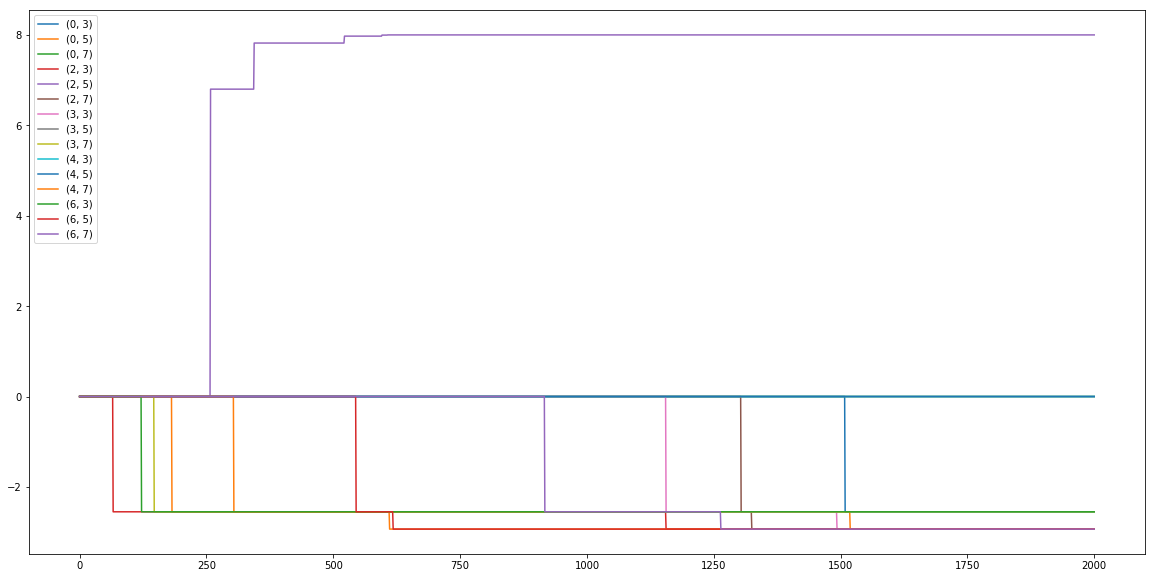

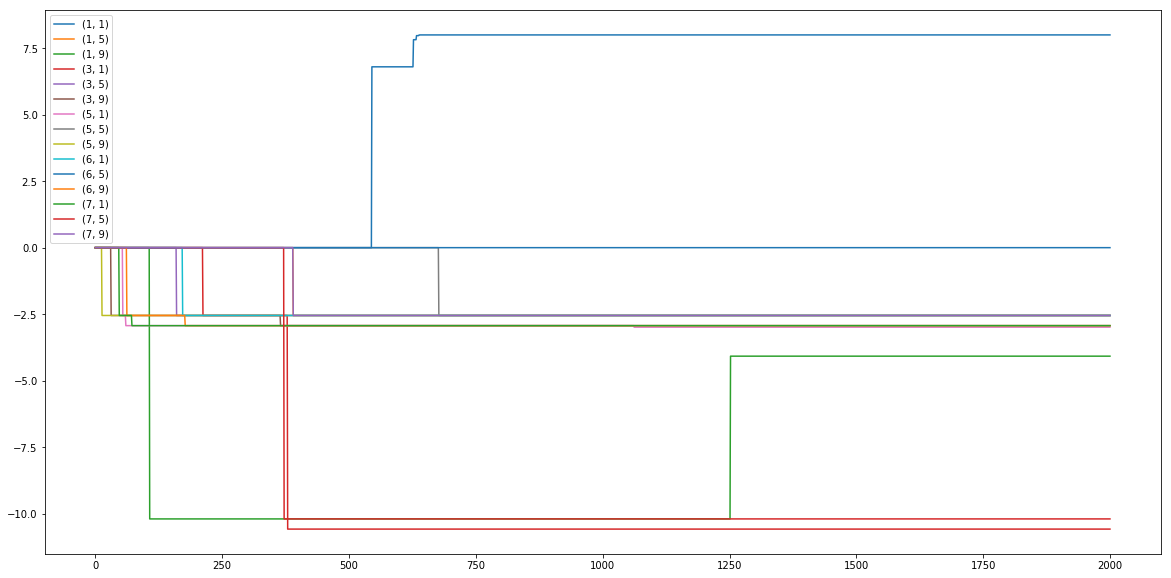

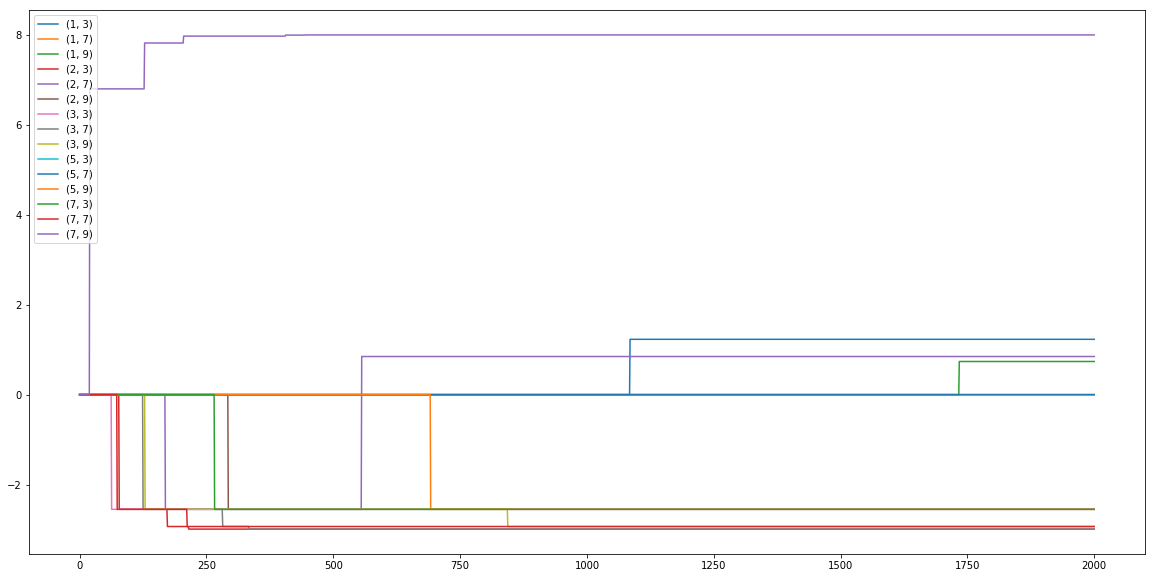

In [21]:
for state in states_tk:
    plt.figure(figsize=(20,10))
    for act in States_track.get(Q_state(state)):
        plt.plot(States_track.get(Q_state(state))[act], label=str(act))
    plt.legend()
    plt.show()

In above graph as expected the maximum value obtained is for the best action that results in a win. 

State : x-8-x-x-x-1-x-6-9 Action : (2, 5) State-Action : 8.0. Placing 5 in position index 2, results in agent winning with last colum as 5,1,9. (purple color line on top)

#### Convergence plot

For a different action let us look at the deltas, the changes in 5000 episodes to the q-value of all the actions for the state.

State : 5-x-x-x-1-x-2-x-4

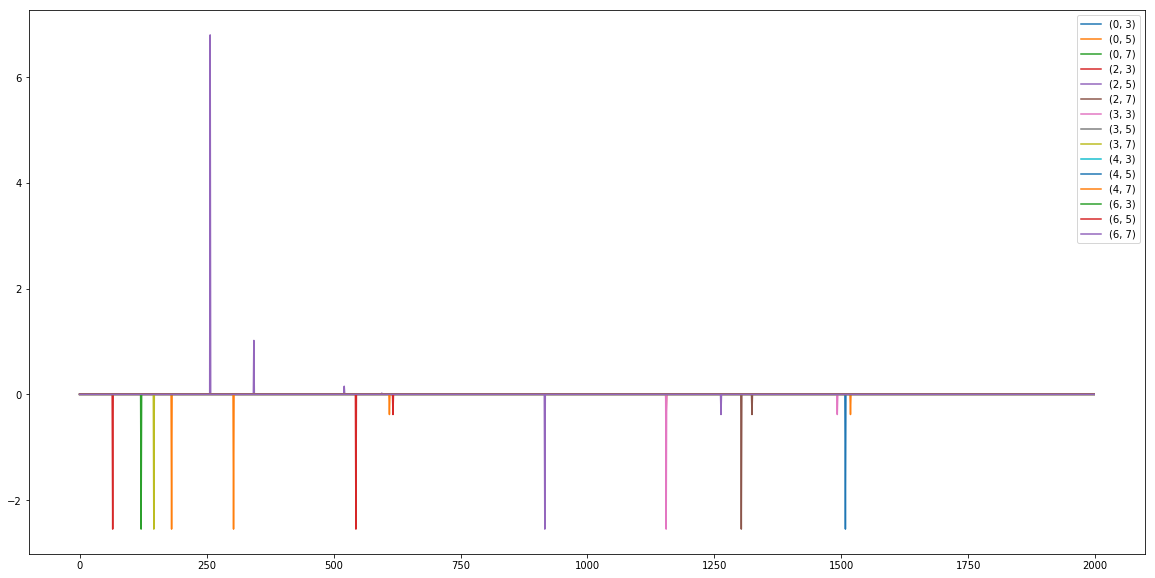

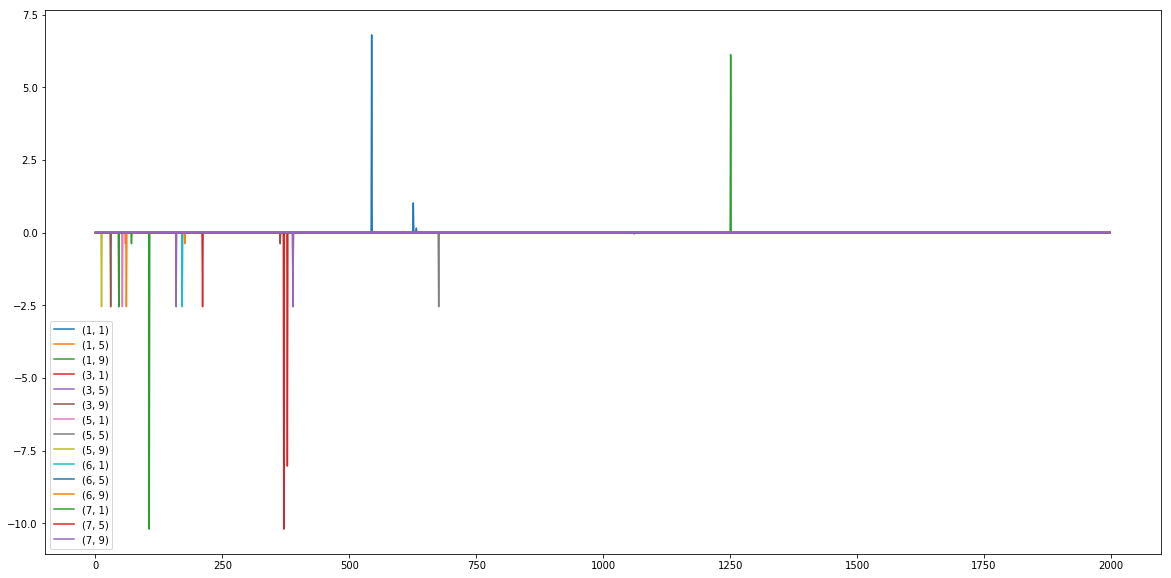

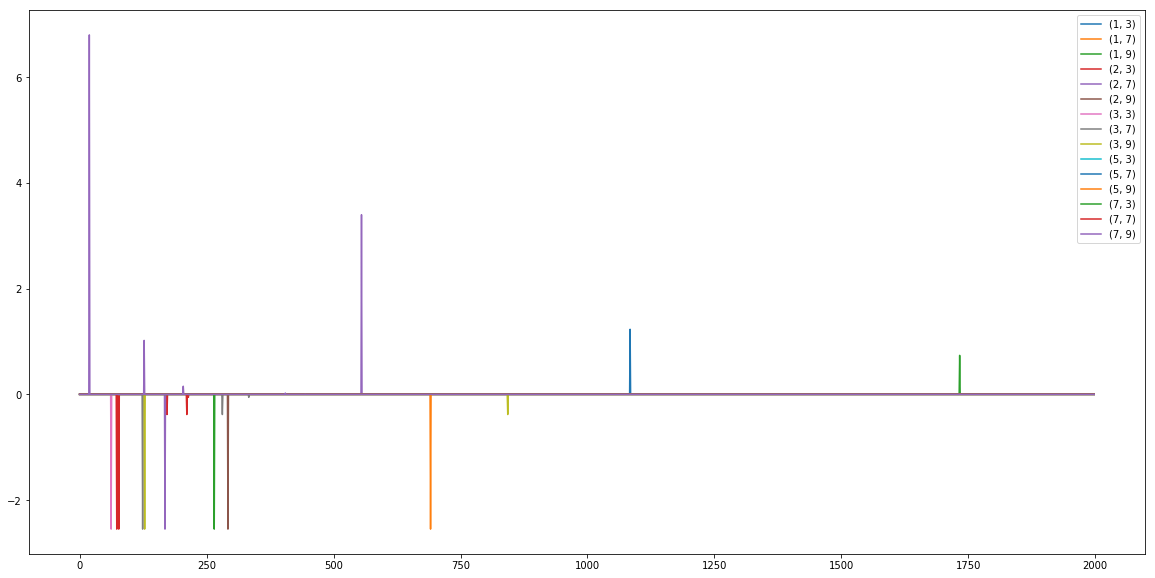

In [22]:
#### Check the states tracked for Q-values convergence (non-evaluative)
for state in states_tk:
    deltas = {}
    for act in States_track.get(Q_state(state)):
        deltas[act] = []
        q_val_list = States_track.get(Q_state(state))[act]
        for i,item in enumerate(q_val_list):
            if(i<len(q_val_list)-2):
                deltas[act].append(q_val_list[i+1] - q_val_list[i])
    plt.figure(figsize=(20,10))
    for act in deltas:
        plt.plot(deltas[act], label=str(act))
    plt.legend()
    plt.show()

As we can see, for all the actions the deltas eventually converge to 0. Meaning after a few episodes the q-value for the state actions pairs stop changing.

## Play the game. 

Make sure to run the following cell to install necessary packages 

In [2]:
'''
import sys

!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension
'''

You should consider upgrading via the 'C:\Softwares\Anaconda3\python.exe -m pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [1]:
from TCGame_Env import TicTacToe # - import your class from environment file
import collections
import numpy as np
import random
import pickle
from time import time
from matplotlib import pyplot as plt
import math

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
st_pickle_in = open("States_tracked.pkl","rb")
States_tracked = pickle.load(st_pickle_in)
pickle_in = open("Policy.pkl","rb")
Q_dict = pickle.load(pickle_in)

In [4]:
import ipywidgets as widgets
from IPython.display import display

In [5]:
env = TicTacToe()
tictac = None
items = []
game_state = []

In [6]:
def callback(wdgt):
    global game_state
    global items
    global env
    board_values = [str(value) for value in game_state]
    if ((wdgt.value not in ['2','4','6','8']) or (wdgt.value in board_values)):
        wdgt.value='x'
        message = 'Please enter an even digit 2-8 that is not present in board'
        print(message)
        return

    game_state[int(wdgt.description)] = int(wdgt.value)
    if(env.is_terminal(game_state)[0]):
        for item in items:
            item.disabled=True
        message = 'Congrats you won' if(env.is_terminal(game_state)[1]=='Win') else 'Oops! No more moves left!'
        print(message)
    else:
        next_act = agent_makes_a_move()
        items[next_act[0]].value = str(next_act[1])
        game_state[next_act[0]] = next_act[1]
        items[int(wdgt.description)].disabled = True
        if(env.is_terminal(game_state)[0]):
            for item in items:
                item.disabled=True
            message = 'You lost! Please try again' if(env.is_terminal(game_state)[1]=='Win') else 'Oops! No more moves left!'
            print(message)

In [7]:
def agent_makes_a_move():
    global game_state
    q_state = Q_dict.get(Q_state(game_state))
    keyMax = max(q_state, key= lambda x: q_state[x])
    valueMax = math.floor(q_state[keyMax])
    allKeys = [k for k, v in q_state.items() if math.floor(v) == valueMax]
    if len(allKeys) == 1:
        next_act = keyMax
    else:
        next_act = random.choice(allKeys)
    return next_act

In [8]:
def make_first_move():  
    global game_state
    global items
    q_state = Q_dict.get(Q_state(game_state))
    moves = q_state.keys()
    next_act = random.choice(list(moves))
    items[next_act[0]].value = str(next_act[1])
    items[next_act[0]].disabled = True
    game_state[next_act[0]] = next_act[1]

In [9]:
def initialize_board():
    global game_state
    global items
    game_state =[np.nan for i in range(0,9)]
    items = []
    for i in range(9):
        wdg = widgets.Text(value='x',description=str(i), disabled=False)
        wdg.on_submit(callback)
        items.append(wdg)

    col_1 = widgets.VBox([items[0], items[3], items[6]])
    col_2 = widgets.VBox([items[1], items[4], items[7]])
    col_3 = widgets.VBox([items[2], items[5], items[8]])
    tictac = widgets.HBox([col_1, col_2, col_3])
    return tictac

In [10]:
def play_game():  
    global game_state
    global items
    global env
    global tictac
    out = widgets.Output(layout={'border': '1px solid black'})
    with out:
        tictac = initialize_board()
        display(tictac)
        make_first_move()
    return out

In [12]:
play_game()

Output(layout=Layout(border='1px solid black'))